# <div align="center"> **Task 2 : Regression**

#### Dataset access link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho 

### Cleaning the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [3]:
# Uploading the dataset
df2 = pd.read_csv(r"C:\Users\DELL\Documents\Car details v3.csv")

In [4]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Checking the number of rows and columns in the dataset
df2.shape

(8128, 13)

In [6]:
# Checking the datatypes
df2.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [7]:
# Cecking for missing values
print("\nMissing Values Per Column:")
print(df2.isnull().sum())


Missing Values Per Column:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [8]:
# Dropping missing values 
df2 = df2.dropna()

In [9]:
# Checking for duplicate rows
duplicates = df2.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 1189


In [10]:
# Dropping duplicate rows
df2 = df2.drop_duplicates()

In [11]:
# Checking the new number of rows and columns in the dataset
df2.shape

(6717, 13)

In [12]:
# Creating a new column called 'Car_Age' , that is the difference between the present year and year of manufacture
from datetime import  datetime
present_year=datetime.now().year
print(present_year)

2025


In [13]:
# Using 2025 to calculate the age of the car
df2['Car_Age']=present_year-df2['year']
df2["Car_Age"]

0       11
1       11
2       19
3       15
4       18
        ..
8121    12
8122    11
8123    12
8124    18
8125    16
Name: Car_Age, Length: 6717, dtype: int64

In [14]:
# Overview of the descriptive statistics (central tendency, dispersion, and distribution) of the dataframe
df2.describe()

,year,selling_price,km_driven,seats,Car_Age
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,5.434271,11.388864
std,3.897402,5.235504e+05,5.870328e+04,0.983805,3.897402
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,5.000000
25%,2011.000000,2.500000e+05,3.800000e+04,5.000000,8.000000
50%,2014.000000,4.200000e+05,6.820300e+04,5.000000,11.000000
75%,2017.000000,6.500000e+05,1.000000e+05,5.000000,14.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,31.000000


Please note for analysis purposes that the selling price mentioned in the dataset is stated in Indian Rupees

In [15]:
#Object Columns Description
df2.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6717,6717,6717,6717,6717,6717,6717,6717,6717
unique,1982,4,3,2,5,393,121,320,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,118,3658,6024,6142,4176,210,907,324,472


In [16]:
df_2= df2
df_2   # Saving an additional dataset for later analysis

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car_Age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,12
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,11
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,12
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,18


### Exploratory Data Analysis

Plotting box plots for numerical columns to identify outliers

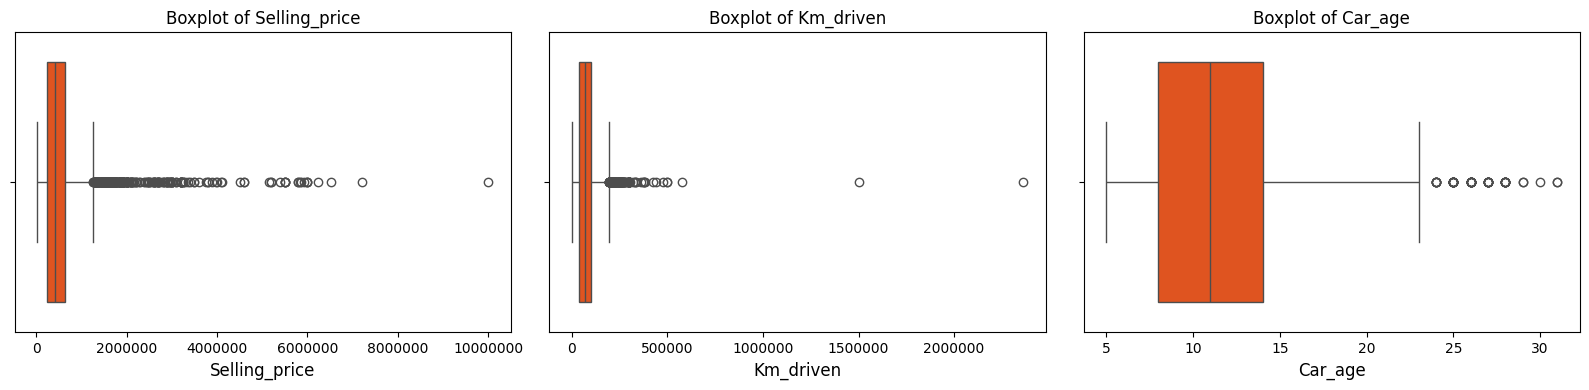

In [17]:
# List of numerical features for boxplots
numerical_features = ['selling_price', 'km_driven', 'Car_Age']

fig, axes = plt.subplots(1, 3, figsize=(16,4), dpi=100)

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df2[feature], ax=axes[i], color='orangered')
    axes[i].set_title(f"Boxplot of {feature.capitalize()}", fontsize=12)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))  # Force integers on x-axis
plt.tight_layout()
plt.show()


Plotting Distribution plots for numerical columns in the dataset

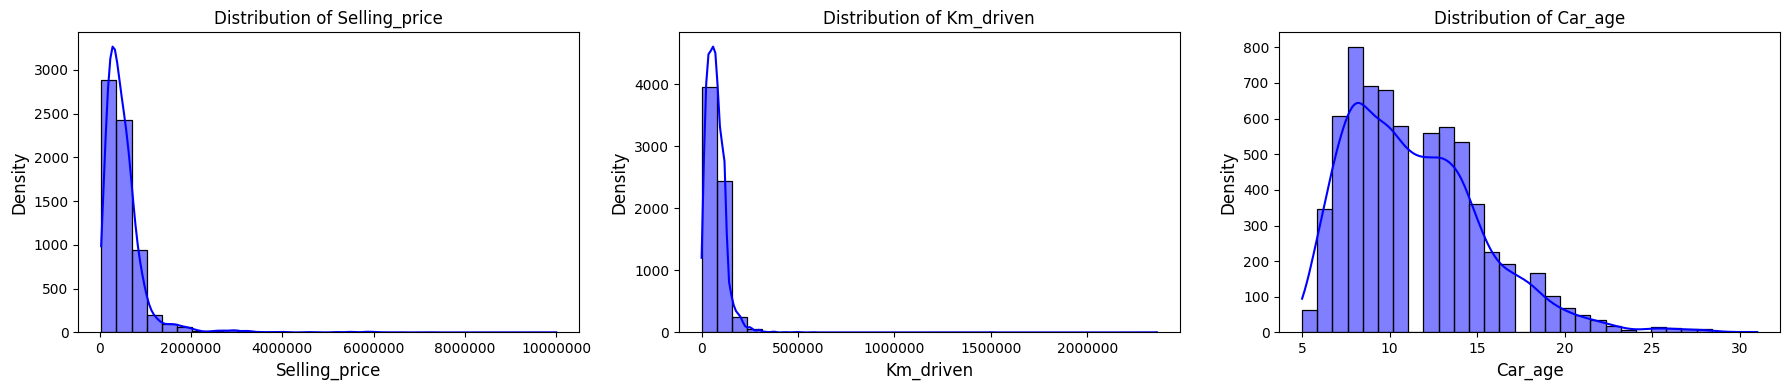

In [18]:
numerical_features = ['selling_price', 'km_driven', 'Car_Age']

fig, axes = plt.subplots(1, 3, figsize=(18, 4), dpi=100)
for i, feature in enumerate(numerical_features):
    sns.histplot(df2[feature], kde=True, ax=axes[i], color='blue', bins=30)
    axes[i].set_title(f"Distribution of {feature.capitalize()}", fontsize=12)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))  
plt.tight_layout()
plt.show()


Plotting Count plots for Categorical columns in the dataset

In [19]:
# Define the parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

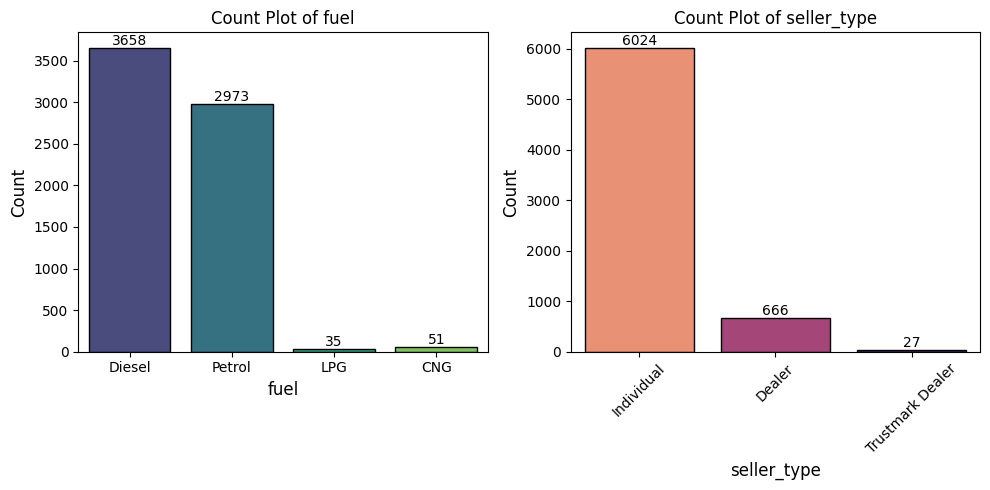

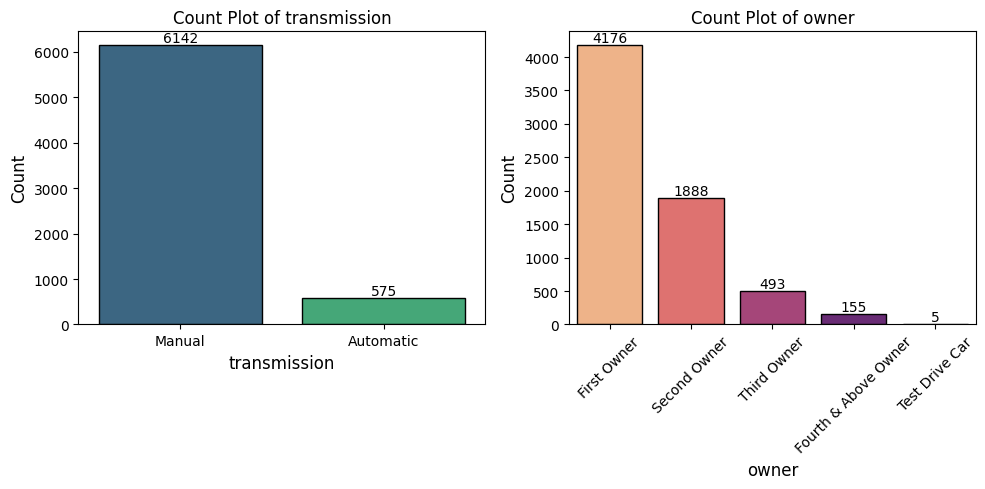

In [20]:
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']
i = 0

while i < len(cat_cols):
    fig = plt.figure(figsize=[10, 5], dpi=100)

   # Plotting the count plots of Fuel and Transmission
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=cat_cols[i], data=df2, hue=cat_cols[i], dodge=False, palette='viridis', edgecolor='black')
    plt.title(f"Count Plot of {cat_cols[i]}", fontsize=12)
    plt.xlabel(cat_cols[i], fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=0)

    for p in ax1.patches:           # Adding count values on top of bars
        ax1.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black')
        
    # Plotting the count plots of Seller Type and Owner
    if i + 1 < len(cat_cols):
        plt.subplot(1, 2, 2)
        ax2 = sns.countplot(x=cat_cols[i + 1], data=df2, hue=cat_cols[i + 1], dodge=False, palette='magma_r', edgecolor='black')
        plt.title(f"Count Plot of {cat_cols[i + 1]}", fontsize=12)
        plt.xlabel(cat_cols[i + 1], fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45)
        
        for p in ax2.patches:             # Adding count values on top of bars
            ax2.annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

    i += 2

Visualising the top 20 Car Names by Count

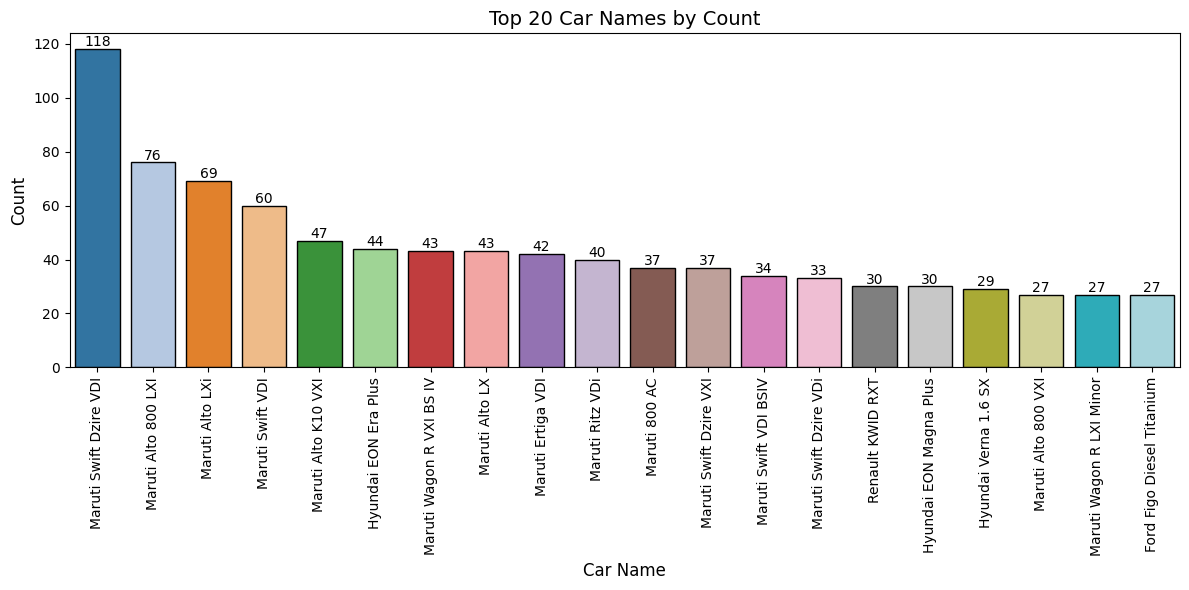

In [21]:
# Getting the top 20 most common car names
top_20_car_names = df2['name'].value_counts().head(20)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_20_car_names.index, y=top_20_car_names.values, hue=top_20_car_names.index, palette='tab20',edgecolor='black')

plt.title('Top 20 Car Names by Count', fontsize=14)
plt.xlabel('Car Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90) 
 
for p in ax.patches:   # Adding the count value on top of each bar
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Visualising the top 10 Most Expensive Cars by Average Selling Price

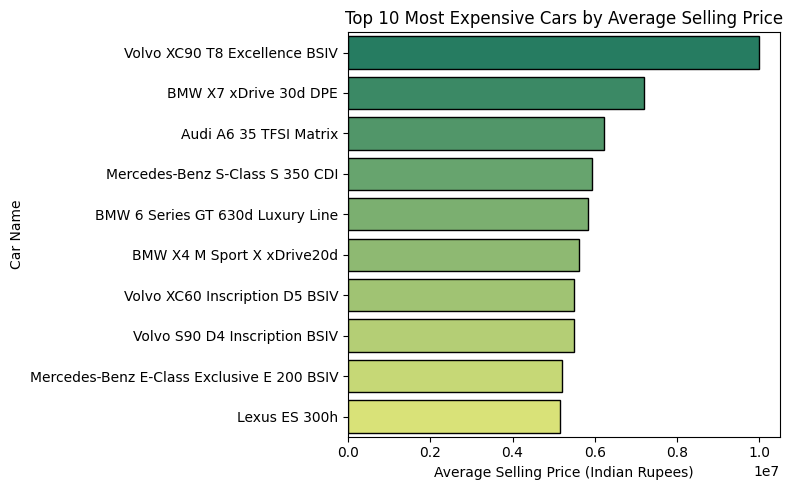

In [22]:
# Group by car name and calculate average selling price
avg_price_by_car = df2.groupby('name')['selling_price'].mean().reset_index()
top_10_expensive_cars = avg_price_by_car.sort_values(by='selling_price', ascending=False).head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(y='name', x='selling_price', data=top_10_expensive_cars, hue='name', palette='summer', edgecolor='black', legend=False)

plt.title('Top 10 Most Expensive Cars by Average Selling Price', fontsize=12)
plt.ylabel('Car Name', fontsize=10)
plt.xlabel('Average Selling Price (Indian Rupees)', fontsize=10)

plt.tight_layout()
plt.show()


Plotting a scatter plot for Selling Price and Car Age

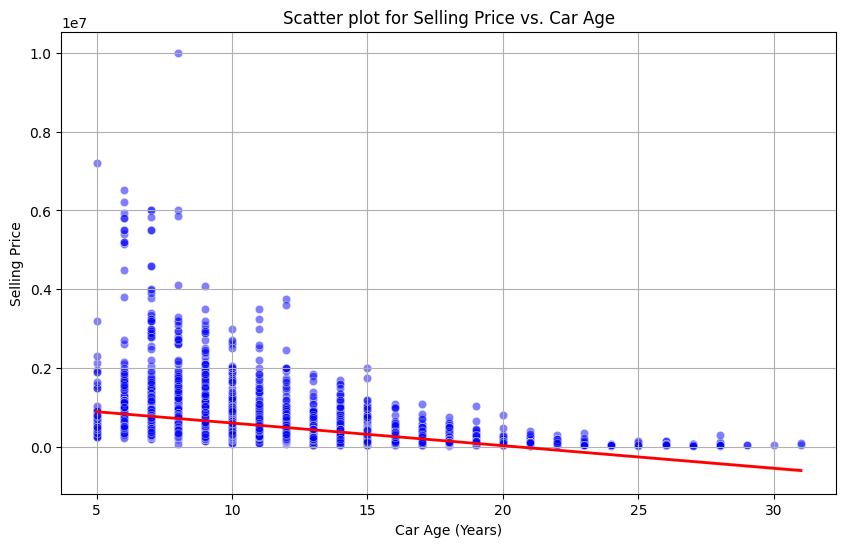

In [23]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2['Car_Age'], y=df2['selling_price'], alpha=0.5, color='blue')

# Adding trend line
sns.regplot(x=df2['Car_Age'], y=df2['selling_price'], scatter=False, color="red", line_kws={"linewidth":2})

plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price")
plt.title("Scatter plot for Selling Price vs. Car Age")
plt.grid(True)
plt.show()

In [24]:
correlation = df2['Car_Age'].corr(df2['selling_price'])
print(f"Correlation coefficient: {correlation:.4f}")

Correlation coefficient: -0.4273


In [25]:
df2['owner'].value_counts()  # looking into the different variables in the owner column

owner
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: count, dtype: int64

In [26]:
# Analysing how the selling price of cars has changed over the years using the manufacturing date of vehicles

def condition(x):
    if 1995<=x<2000:
        return '1995-2000'
    elif 2000<=x<2005:
        return '2000-2005'
    elif 2005<=x<2010:
        return '2005-2010'
    elif 2010<=x<2015:
        return '2010-2015'
    elif 2015<=x<=2020:
        return '2015-2020'
        
df_2['Manufactured_Year_range']=df_2['year'].apply(lambda x:condition(x))    
new  = df_2.groupby('Manufactured_Year_range')['selling_price'].mean().reset_index()
new=new.rename(columns={'selling_price':'Average Selling Price'})
new
# we can see a big increase in the average selling price of vehicles when comparing the yearly interval of '2010-2015' and '2015-2020'

,Manufactured_Year_range,Average Selling Price
0,1995-2000,69411.735294
1,2000-2005,99325.887097
2,2005-2010,195836.537748
3,2010-2015,391433.336524
4,2015-2020,736875.821944


Visualising the average Selling Price over the Years of Manufacture using a Line Plot 

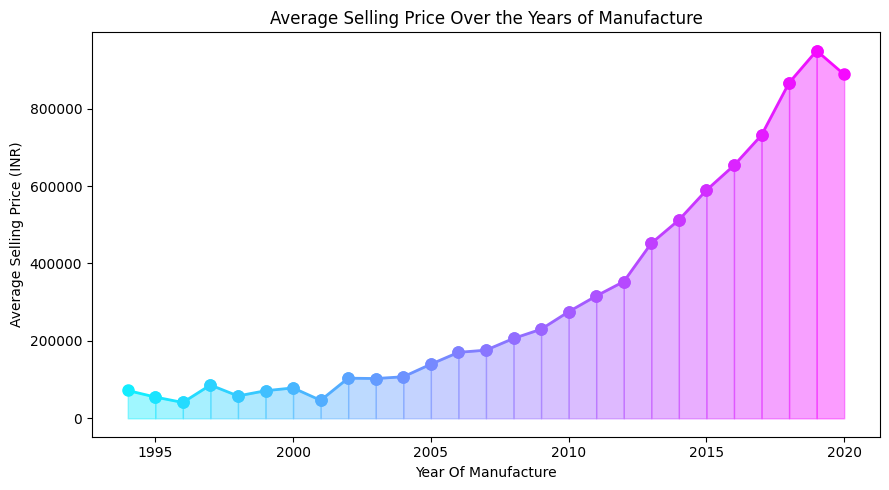

In [27]:
# Ensure we use exact years from the dataset, not the grouped ranges
df_2['year'] = df_2['year'].astype(int)

# Group by exact years and calculate average selling price
new = df_2.groupby('year')['selling_price'].mean().reset_index()
new = new.rename(columns={'selling_price': 'Average Selling Price'})

palette = sns.color_palette('cool', n_colors=len(new))
plt.figure(figsize=(9, 5))

# Plot the trend with the exact years from 1995 to 2020
for i in range(1, len(new)):
    plt.plot(
        new['year'][i-1:i+1],
        new['Average Selling Price'][i-1:i+1],
        marker='o',
        color=palette[i],
        linestyle='-',
        linewidth=2,
        markersize=8,
    )
    # Filling the area beneath the line with a gradient color
    plt.fill_between(
        new['year'][i-1:i+1],
        new['Average Selling Price'][i-1:i+1],
        color=palette[i],
        alpha=0.4,
    )
plt.title('Average Selling Price Over the Years of Manufacture', fontsize=12)
plt.xlabel('Year Of Manufacture', fontsize=10)
plt.ylabel('Average Selling Price (INR)', fontsize=10)

# Set custom ticks for x-axis (individual years from 1995 to 2020)
plt.xticks(ticks=range(1995, 2021, 5))
plt.tight_layout()
plt.show()

In [28]:
# Encoding the data in  the 'owner' column 

df_2['owner'] = df_2['owner'].map({'First Owner':1, 'Second Owner': 2, 'Third Owner':3, 'Fourth & Above Owner':4,'Test Drive Car':0})

Displaying the minimum, maximum and average Selling Price by Owner Type using a Dumbell Plot

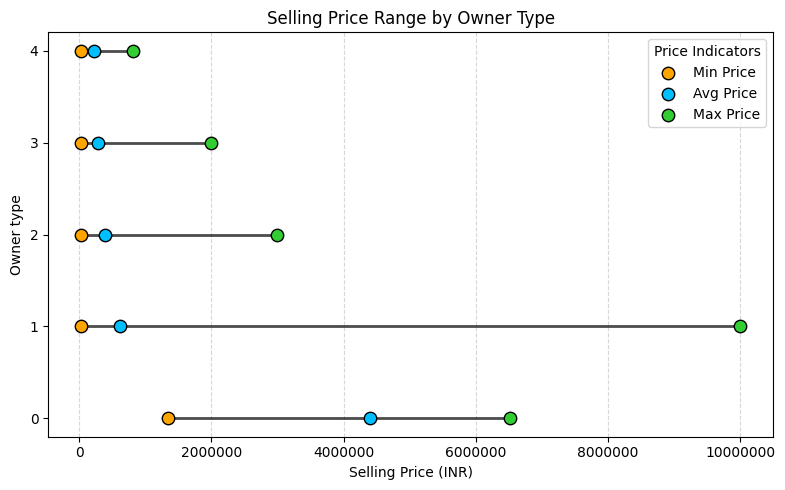


--- Values Used in Dumbbell Chart ---
   Owner Type  Min Price  Average Price  Max Price
0           0    1350000        4403800    6523000
1           1      30000         620511   10000000
2           2      35000         393886    3000000
3           3      29999         289751    2000000
4           4      31000         231970     810000


In [29]:
#Calculating average selling prices by owner type
owner_price = df_2.groupby('owner')['selling_price'].mean().reset_index()
owner_types = owner_price['owner']
avg_prices = owner_price['selling_price']

#Calculating min, max selling prices by owner type
min_prices = df2.groupby('owner')['selling_price'].min().reindex(owner_types)
max_prices = df2.groupby('owner')['selling_price'].max().reindex(owner_types)

# Plotting the dumbbell chart
plt.figure(figsize=(8, 5))
for i, owner in enumerate(owner_types):  
    avg_val = avg_prices.iloc[i]  
    min_val = min_prices.loc[owner]  
    max_val = max_prices.loc[owner] 

    plt.plot([min_val, max_val], [i, i], color='black', linewidth=2, alpha=0.7)  
    plt.scatter(min_val, i, color='orange', s=80, edgecolor='black', zorder=3, label='Min Price' if i == 0 else "_nolegend_")  
    plt.scatter(avg_val, i, color='deepskyblue', s=80, edgecolor='black', zorder=3, label='Avg Price' if i == 0 else "_nolegend_")  
    plt.scatter(max_val, i, color='limegreen', s=80, edgecolor='black', zorder=3, label='Max Price' if i == 0 else "_nolegend_")  

plt.yticks(range(len(owner_types)), owner_types)
plt.xlabel('Selling Price (INR)')
plt.ylabel('Owner type')
plt.title('Selling Price Range by Owner Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.xticks(rotation=0)  
plt.ticklabel_format(style='plain', axis='x')  
plt.legend(title="Price Indicators", loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

# Printing min, max, and average values
formatted_data = pd.DataFrame({
    'Owner Type': owner_types,
    'Min Price': min_prices.values,
    'Average Price': avg_prices.astype(int),  
    'Max Price': max_prices.values
})
print("\n--- Values Used in Dumbbell Chart ---")
print(formatted_data)

We can see that as the number of owners increases, the average selling price (value) of the cars decrease, with a drastic drop from 0 to 1 owners.

Plotting the average kilometers driven by number of previous owners using a Bar Plot

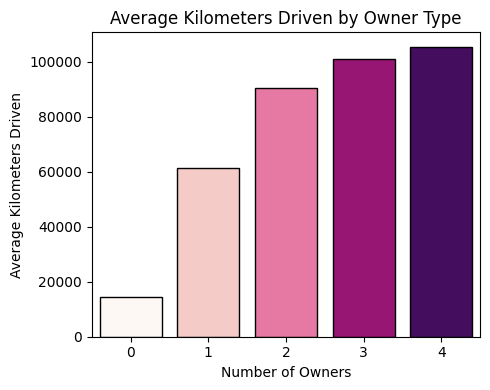

In [30]:
# Calculate the average kilometers driven for each owner category
owner_km_avg = df2.groupby('owner')['km_driven'].mean().reset_index()

# Bar plot for average km_driven by owner
plt.figure(figsize=(5, 4))
sns.barplot(x='owner', y='km_driven', data=owner_km_avg, hue='owner', palette='RdPu', edgecolor='black', legend=False)

plt.title('Average Kilometers Driven by Owner Type', fontsize=12)
plt.xlabel('Number of Owners', fontsize=10)
plt.ylabel('Average Kilometers Driven', fontsize=10)
plt.tight_layout()
plt.show()

Visualising the distribution of Selling Price by Km_Driven Categories using a Violin Plot

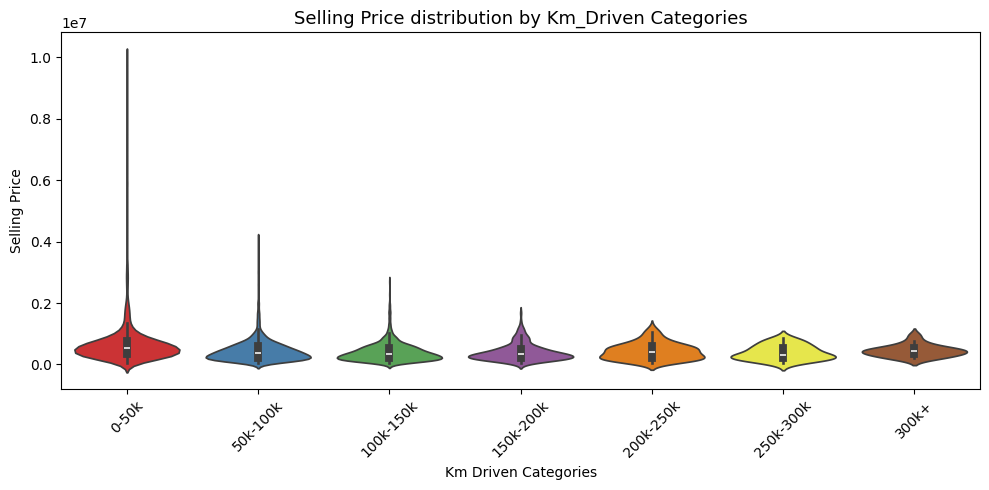

In [31]:
# Create bins for Kms_Driven
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, float('inf')]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k+']
df2['Kms_Driven_Category'] = pd.cut(df2['km_driven'], bins=bins, labels=labels)

# Plot violin plot for Selling Price vs Kms Driven categories
plt.figure(figsize=(10, 5))
sns.violinplot(x='Kms_Driven_Category', y='selling_price', data=df2, hue='Kms_Driven_Category', palette='Set1', legend=False)
plt.title('Selling Price distribution by Km_Driven Categories', fontsize=13)
plt.xlabel('Km Driven Categories', fontsize=10)
plt.ylabel('Selling Price', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Evaluating the relationship between Selling Price and Km Driven using a Scatterplot

<Axes: title={'center': 'Scatter plot for Selling Price vs Km Driven'}, xlabel='km_driven', ylabel='selling_price'>

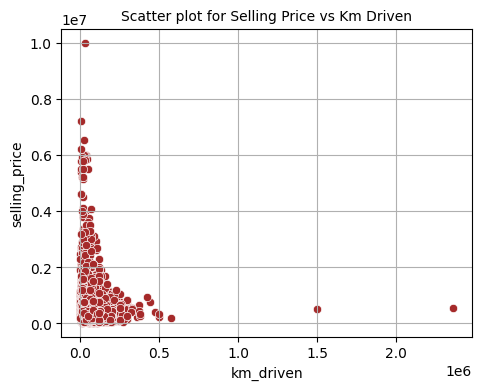

In [32]:
# Let us now take a look at the relationship between age of the car and the km driven
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title('Scatter plot for Selling Price vs Km Driven', fontsize=10)
plt.grid(True)
sns.scatterplot(x='km_driven', y='selling_price', data=df_2, color='brown')

In [33]:
correlation = df2['km_driven'].corr(df2['selling_price'])
print(f"Correlation coefficient: {correlation:.4f}")

Correlation coefficient: -0.1613


Evaluating the relationship between Car Age and Km Driven using a Scatterplot

<Axes: title={'center': 'Scatter plot for Km Driven vs Car Age'}, xlabel='Car_Age', ylabel='km_driven'>

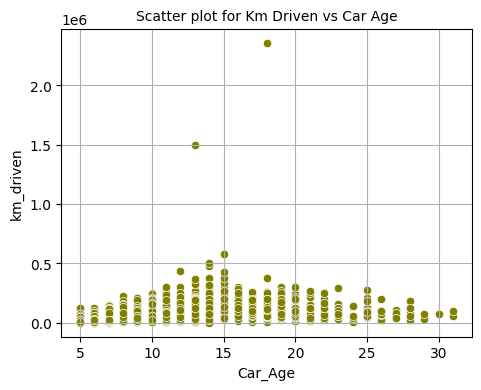

In [34]:
# Let us now take a look at the relationship between age of the car and the km driven
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title('Scatter plot for Km Driven vs Car Age', fontsize=10)
plt.grid(True)
sns.scatterplot(x='Car_Age', y='km_driven', data=df_2, color='olive')


In [35]:
correlation = np.corrcoef(df_2['Car_Age'],df_2['km_driven'])
correlation   # We can see a slightly moderate positive linear relationship

array([[1.        , 0.38791845],
       [0.38791845, 1.        ]])

In [36]:
# Breaking 'Car_Age' into ranges into a new column 'Age_Range'

# Define the age range bins and labels
bins = [0, 10, 20, 30, 40]  
labels = ['0-10', '11-20', '21-30', '31-40']

df_2['Age_range'] = pd.cut(df_2['Car_Age'], bins=bins, labels=labels, right=False)  # Create a new column 'Age_range' based on 'Car_Age'

Plotting the average Kilometers Driven by Age Range using a Bar Plot

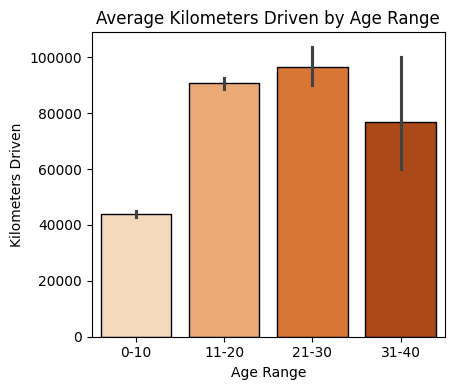

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.barplot(x='Age_range', y='km_driven', data=df_2, palette='Oranges', hue='Age_range', edgecolor='black', legend=False)

plt.title('Average Kilometers Driven by Age Range', fontsize=12)
plt.xlabel('Age Range', fontsize=10)
plt.ylabel('Kilometers Driven', fontsize=10)

plt.tight_layout()
plt.show()

In [38]:
# Converting 'mileage' to string 
df_2['mileage'] = df_2['mileage'].astype(str)

# Removing 'kmpl' or 'km/kg' from the 'mileage' column
df_2['mileage'] = df_2['mileage'].str.replace(r'\s*(kmpl|km/kg)\s*', '', regex=True)

# Converting the 'mileage' column to numeric
df_2['mileage'] = pd.to_numeric(df_2['mileage'], errors='coerce')

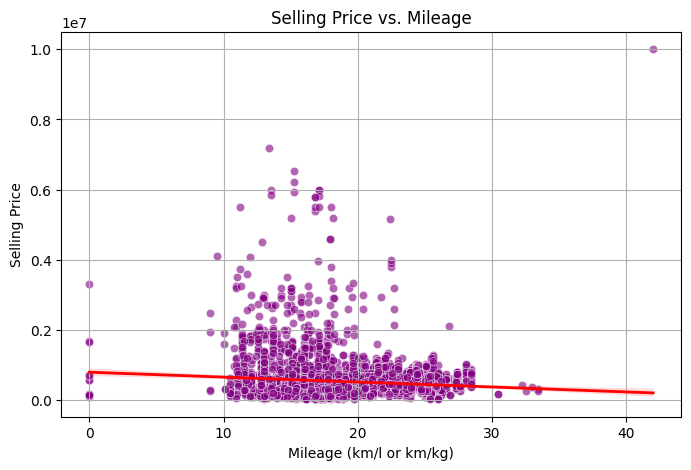

In [39]:
plt.figure(figsize=(8, 5))

# Scatter plot with regression line
sns.scatterplot(x=df_2['mileage'], y=df_2['selling_price'], color='purple', alpha=0.6)
sns.regplot(x=df_2['mileage'], y=df_2['selling_price'], scatter=False, color="red", line_kws={"linewidth": 2})

# Labels and title
plt.xlabel('Mileage (km/l or km/kg)')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Mileage')
plt.grid(True)
plt.show()

In [40]:
# Calculate the correlation coefficient matrix
correlation_matrix = np.corrcoef(df_2['mileage'], df_2['selling_price'])

# Extract and display the correlation coefficient
correlation_coefficient = correlation_matrix[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")

Correlation Coefficient: -0.1087


In [41]:
# Grouping df by fuel type and getting the average selling price

new  = df2.groupby('fuel')['selling_price'].mean().reset_index()
new=new.rename(columns={'selling_price':'Average Selling Price'})
new  # We can see diesel vehicles are the most expensive vehicles on average 

,fuel,Average Selling Price
0,CNG,317666.607843
1,Diesel,647996.111536
2,LPG,210885.714286
3,Petrol,384050.780020


Displaying the average Selling Price by Fuel Type using a Lollipop chart

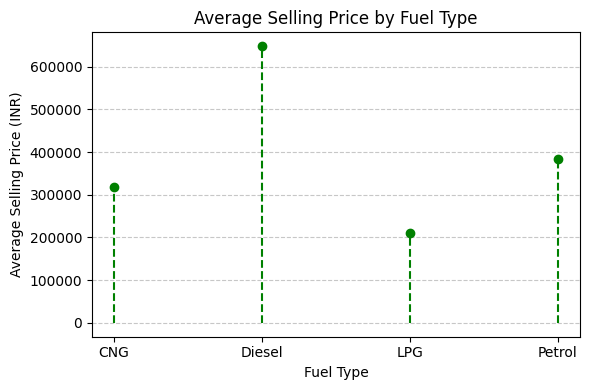

In [42]:
plt.figure(figsize=(6, 4))

plt.stem(new['fuel'], new['Average Selling Price'],  linefmt='g--', markerfmt='o', basefmt=" ")
plt.title('Average Selling Price by Fuel Type', fontsize=12)
plt.xlabel('Fuel Type', fontsize=10)
plt.ylabel('Average Selling Price (INR)', fontsize=10)
plt.xticks(ticks=new['fuel'], labels=new['fuel'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Analyzing if the fuel type has an impact on mileage

In [43]:
# Group by 'fuel' and calculate the average mileage
new = df_2.groupby('fuel')['mileage'].mean().reset_index()

# Rename the 'mileage' column to 'Average Mileage'
new = new.rename(columns={'mileage': 'Average Mileage'})
new

,fuel,Average Mileage
0,CNG,24.243922
1,Diesel,19.738997
2,LPG,18.577143
3,Petrol,19.059926


In [44]:
# Looking into the variables in the transmission column
df_2['transmission'].value_counts()

transmission
Manual       6142
Automatic     575
Name: count, dtype: int64

In [45]:
# Calculating the average selling price for each transmission type
avg_selling_price_by_transmission = df_2.groupby('transmission')['selling_price'].mean().reset_index()

avg_selling_price_by_transmission = avg_selling_price_by_transmission.rename(columns={'selling_price': 'Average Selling Price'}) # Renaming the column for clarity
print(avg_selling_price_by_transmission)  # We see on average individual seller vehicles are the most expensive vehicles

  transmission  Average Selling Price
0    Automatic           1.322916e+06
1       Manual           4.518166e+05


Plotting the average Selling Price by Transmission Type using a Bar Plot

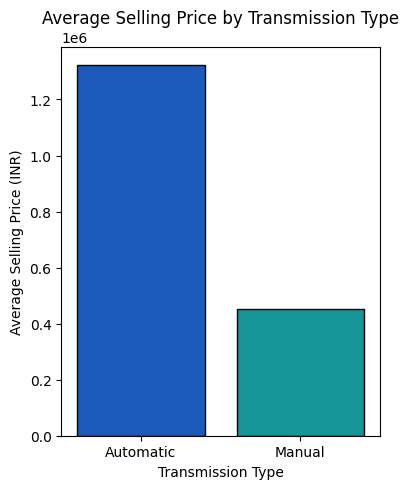

In [46]:
# Grouping the data by 'transmission' and calculating the average selling price
avg_selling_price_by_transmission = df_2.groupby('transmission')['selling_price'].mean().reset_index()
avg_selling_price_by_transmission = avg_selling_price_by_transmission.rename(columns={'selling_price': 'Average Selling Price'})

# Plotting the bar chart 
plt.figure(figsize=(4, 5))
sns.barplot(x='transmission', y='Average Selling Price', data=avg_selling_price_by_transmission, palette='winter', hue='transmission', edgecolor='black')

plt.title('Average Selling Price by Transmission Type', fontsize=12)
plt.xlabel('Transmission Type', fontsize=10)
plt.ylabel('Average Selling Price (INR)', fontsize=10)
plt.tight_layout()
plt.show()

Plotting a pairplot for Selling Price, Car Age, and Fuel Type

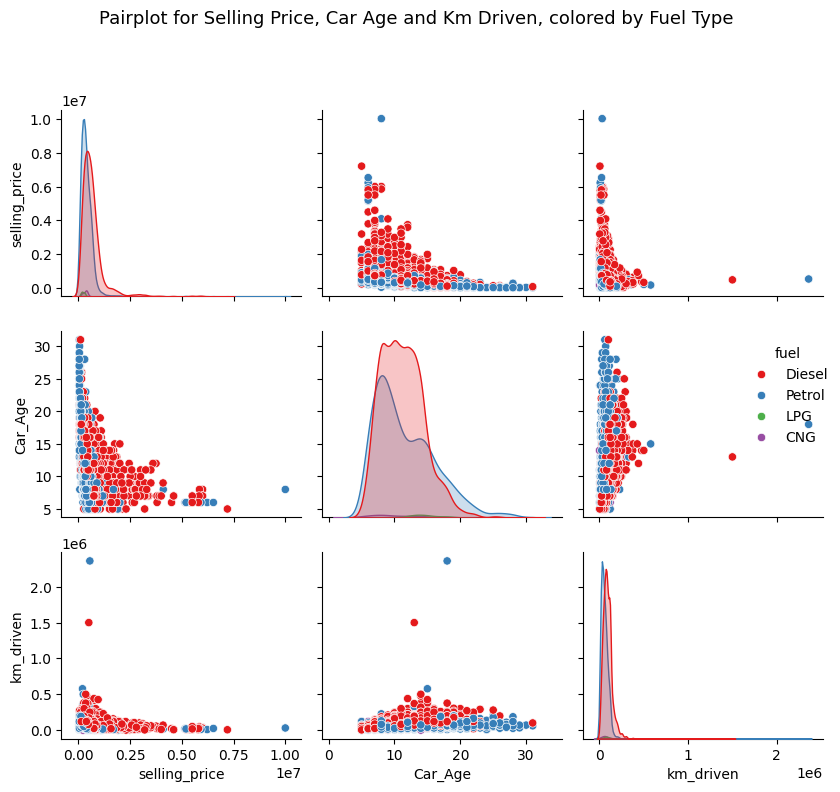

In [47]:

# Selecting the relevant columns and including Fuel Type as hue
pairplot_data = df2[['selling_price', 'Car_Age', 'km_driven', 'fuel']]

# Creating pairplot with Fuel Type as hue
sns.pairplot(pairplot_data, hue='fuel', palette='Set1')
plt.suptitle('Pairplot for Selling Price, Car Age and Km Driven, colored by Fuel Type', fontsize=13, y=1.05)
plt.tight_layout()
plt.show()

Analyzing if the seller_type has an impact on selling price

In [48]:
# Grouping df by fuel type and getting the average selling price

new  = df2.groupby('seller_type')['selling_price'].mean().reset_index()
new=new.rename(columns={'selling_price':'Average Selling Price'})
new     # We see on average Dealer vehicles are the most expensive vehicles

,seller_type,Average Selling Price
0,Dealer,936708.656156
1,Individual,480162.313579
2,Trustmark Dealer,718111.111111


Displaying the minimum, maximum and average Selling Price by Seller Type using a Dumbell Plot

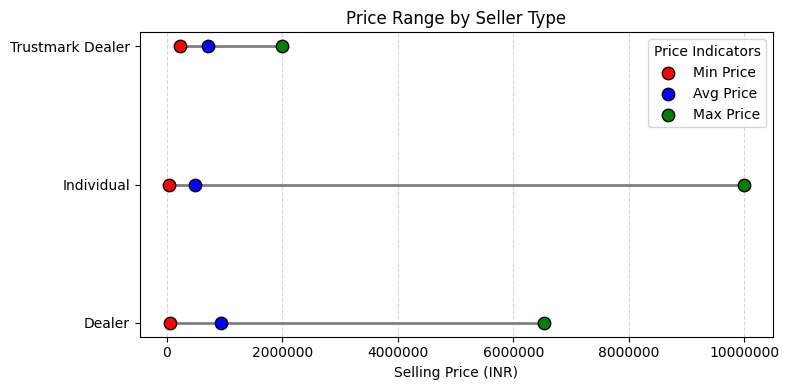


--- Values Used in Dumbbell Chart ---
        Seller Type  Min Price  Average Price  Max Price
0            Dealer      60000  936708.656156    6523000
1        Individual      29999  480162.313579   10000000
2  Trustmark Dealer     225000  718111.111111    2000000


In [49]:
# Initialize lists to store the values
seller_types, min_prices, avg_prices, max_prices = [], [], [], []

plt.figure(figsize=(8, 4))

# Loop to create the dumbbell chart and store values
for i, row in new.iterrows():
    seller = row['seller_type']
    avg_val = row['Average Selling Price']
    min_val = df2[df2['seller_type'] == seller]['selling_price'].min()
    max_val = df2[df2['seller_type'] == seller]['selling_price'].max()

    # Plot line and points
    plt.plot([min_val, max_val], [i, i], color='gray', linewidth=2, label='_nolegend_')
    plt.scatter(min_val, i, color='red', s=80, edgecolor='black', zorder=3, label='Min Price' if i == 0 else "_nolegend_")
    plt.scatter(avg_val, i, color='blue', s=80, edgecolor='black', zorder=3, label='Avg Price' if i == 0 else "_nolegend_")
    plt.scatter(max_val, i, color='green', s=80, edgecolor='black', zorder=3, label='Max Price' if i == 0 else "_nolegend_")
    seller_types.append(seller)
    min_prices.append(min_val)
    avg_prices.append(avg_val)
    max_prices.append(max_val)

# Plot details
plt.yticks(range(len(new['seller_type'])), new['seller_type'])
plt.xlabel('Selling Price (INR)')
plt.title('Price Range by Seller Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)  # Ensure labels are horizontal
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation
plt.legend(title="Price Indicators", loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

# Print min, avg, and max prices
price_df = pd.DataFrame({
    'Seller Type': seller_types,
    'Min Price': min_prices,
    'Average Price': avg_prices,
    'Max Price': max_prices
})
print("\n--- Values Used in Dumbbell Chart ---")
print(price_df)

Analysing if the number of seats in a vehicle has an impact on the selling price

In [50]:
#does the  number of seats in a vehicle have an impact on the selling price of a vehicle?
new  = df_2.groupby('seats')['selling_price'].mean().reset_index()
new=new.rename(columns={'selling_price':'Average Selling Price'})
new  

,seats,Average Selling Price
0,2.0,700500.000000
1,4.0,386807.266129
2,5.0,478232.906167
3,6.0,560684.210526
4,7.0,798927.504141
5,8.0,572832.538462
6,9.0,503540.472973
7,10.0,328777.611111
8,14.0,235000.000000


Displaying the average Selling Price by Number of Seats using a Lollipop Plot

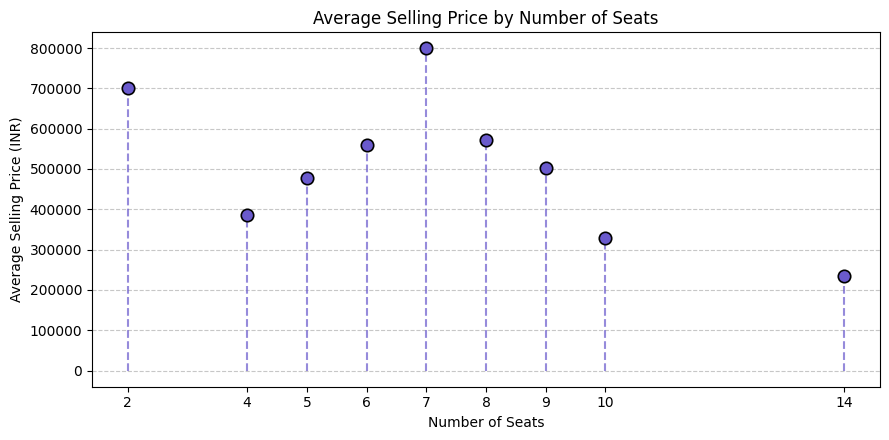

In [51]:
# Grouping the data by 'seats' and calculating the average selling price
new = df_2.groupby('seats')['selling_price'].mean().reset_index()
new = new.rename(columns={'selling_price': 'Average Selling Price'})

# Plotting the lollipop chart
plt.figure(figsize=(9, 4.5))

# Vertical stems
plt.vlines(x=new['seats'], ymin=0, ymax=new['Average Selling Price'], color='slateblue', linestyles='dashed', alpha=0.7)

# Markers (lollipops)
plt.scatter(new['seats'], new['Average Selling Price'], color='slateblue', s=80, edgecolors='black', linewidth=1.2, zorder=3)

# Labels and styling
plt.title('Average Selling Price by Number of Seats', fontsize=12)
plt.xlabel('Number of Seats', fontsize=10)
plt.ylabel('Average Selling Price (INR)', fontsize=10)
plt.xticks(ticks=[2, 4, 5, 6, 7, 8, 9, 10, 14])  # Custom X-ticks for seat values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Further Data Preparation

In [52]:
# Removing outliers from 'selling_price' and 'km_driven' variables 
# Filtering out data above the 99th percentile removes extreme outliers, improving the robustness of analyses or models.

In [53]:
# Calculating the 99th percentile thresholds for 'selling_price' and 'km_driven'
price_threshold = np.percentile(df_2['selling_price'], 99)
km_threshold = np.percentile(df_2['km_driven'], 99)

df2_f = df_2[(df_2['selling_price'] <= price_threshold) & (df_2['km_driven'] <= km_threshold)] # Filtering the dataset to exclude outliers

# Display the updated dataset shape and thresholds
print(f"Original dataset shape: {df_2.shape}")
print(f"Filtered dataset shape: {df2_f.shape}")
print(f"99th Percentile of Selling Price: {price_threshold}")
print(f"99th Percentile of KM Driven: {km_threshold}")


Original dataset shape: (6717, 17)
Filtered dataset shape: (6581, 17)
99th Percentile of Selling Price: 2792000.0000000075
99th Percentile of KM Driven: 239912.1600000001


Visualising the new distributions of Selling Price and Km Drive using Box Plots

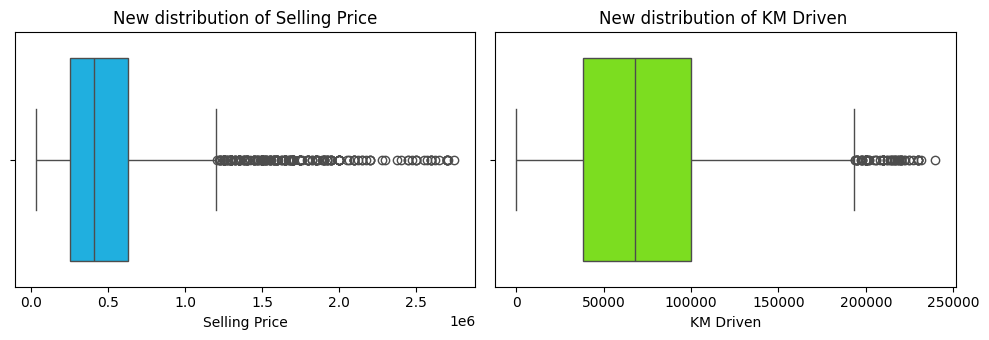

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), dpi=100)

# Box plot for 'selling_price'
sns.boxplot(data=df2_f, x='selling_price', ax=axes[0], color='deepskyblue')
axes[0].set_title('New distribution of Selling Price', fontsize=12)
axes[0].set_xlabel('Selling Price', fontsize=10)

# Box plot for 'km_driven'
sns.boxplot(data=df2_f, x='km_driven', ax=axes[1], color='lawngreen')
axes[1].set_title('New distribution of KM Driven ', fontsize=12)
axes[1].set_xlabel('KM Driven', fontsize=10)

plt.tight_layout()
plt.show()

Visualising the original distributions of Selling Price and Km Drive using Box Plots for comparison

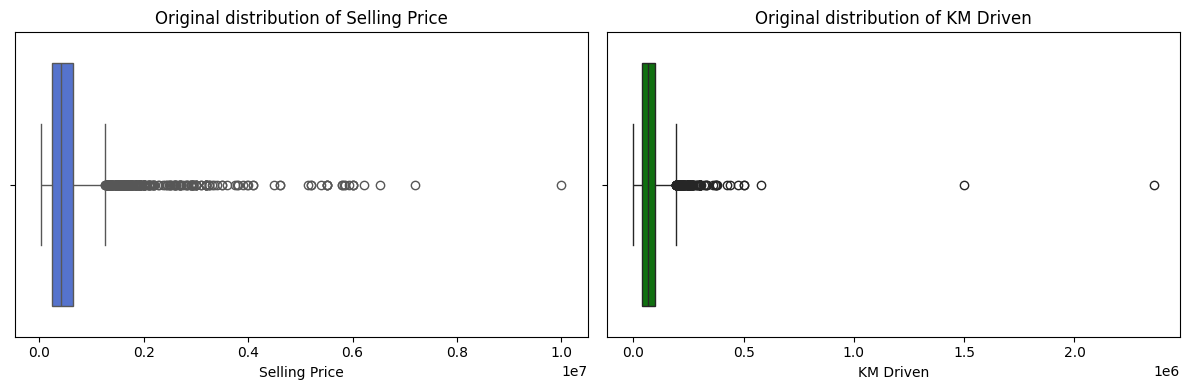

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=100)

# Box plot for 'selling_price' in the initial dataset
sns.boxplot(data=df2, x='selling_price', ax=axes[0], color='royalblue')
axes[0].set_title('Original distribution of Selling Price', fontsize=12)
axes[0].set_xlabel('Selling Price', fontsize=10)

# Box plot for 'km_driven' in the initial dataset
sns.boxplot(data=df2, x='km_driven', ax=axes[1], color='green')
axes[1].set_title('Original distribution of KM Driven', fontsize=12)
axes[1].set_xlabel('KM Driven', fontsize=10)

plt.tight_layout()
plt.show()

In [56]:
# Drop unrequired columns
df2 = df2.drop(columns=['name', 'year', 'Age_range', 'Manufactured_Year_range','Kms_Driven_Category'])

# Verify the columns are dropped
df2.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car_Age
0,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,11
1,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,11
2,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,19
3,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,15
4,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,18


In [57]:
#Revert mileage column back to object 
df2['mileage'] = df2['mileage'].astype(str)


In [58]:
df2.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
mileage           object
engine            object
max_power         object
torque            object
seats            float64
Car_Age            int64
dtype: object

In [59]:
# Filter categorical variables
categorical_columns = df2.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['fuel', 'seller_type', 'transmission', 'mileage', 'engine', 'max_power',
       'torque'],
      dtype='object')


In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df2.columns:
    if df2[column].dtype == 'object':
        df2[column] = label_encoder.fit_transform(df2[column])

# Encoded DataFrame
print(df2)

      selling_price  km_driven  fuel  seller_type  transmission  owner  \
0            450000     145500     1            1             1      1   
1            370000     120000     1            1             1      2   
2            158000     140000     3            1             1      3   
3            225000     127000     1            1             1      1   
4            130000     120000     3            1             1      1   
...             ...        ...   ...          ...           ...    ...   
8121         260000      50000     3            1             1      2   
8122         475000      80000     1            1             1      2   
8123         320000     110000     3            1             1      1   
8124         135000     119000     1            1             1      4   
8125         382000     120000     1            1             1      1   

      mileage  engine  max_power  torque  seats  Car_Age  
0         323      13        242     178    5.0     

In [61]:
df2.dtypes

selling_price      int64
km_driven          int64
fuel               int32
seller_type        int32
transmission       int32
owner              int64
mileage            int32
engine             int32
max_power          int32
torque             int32
seats            float64
Car_Age            int64
dtype: object

Evaluating the relationships between Selling Price and numerical features using Scatter Plots

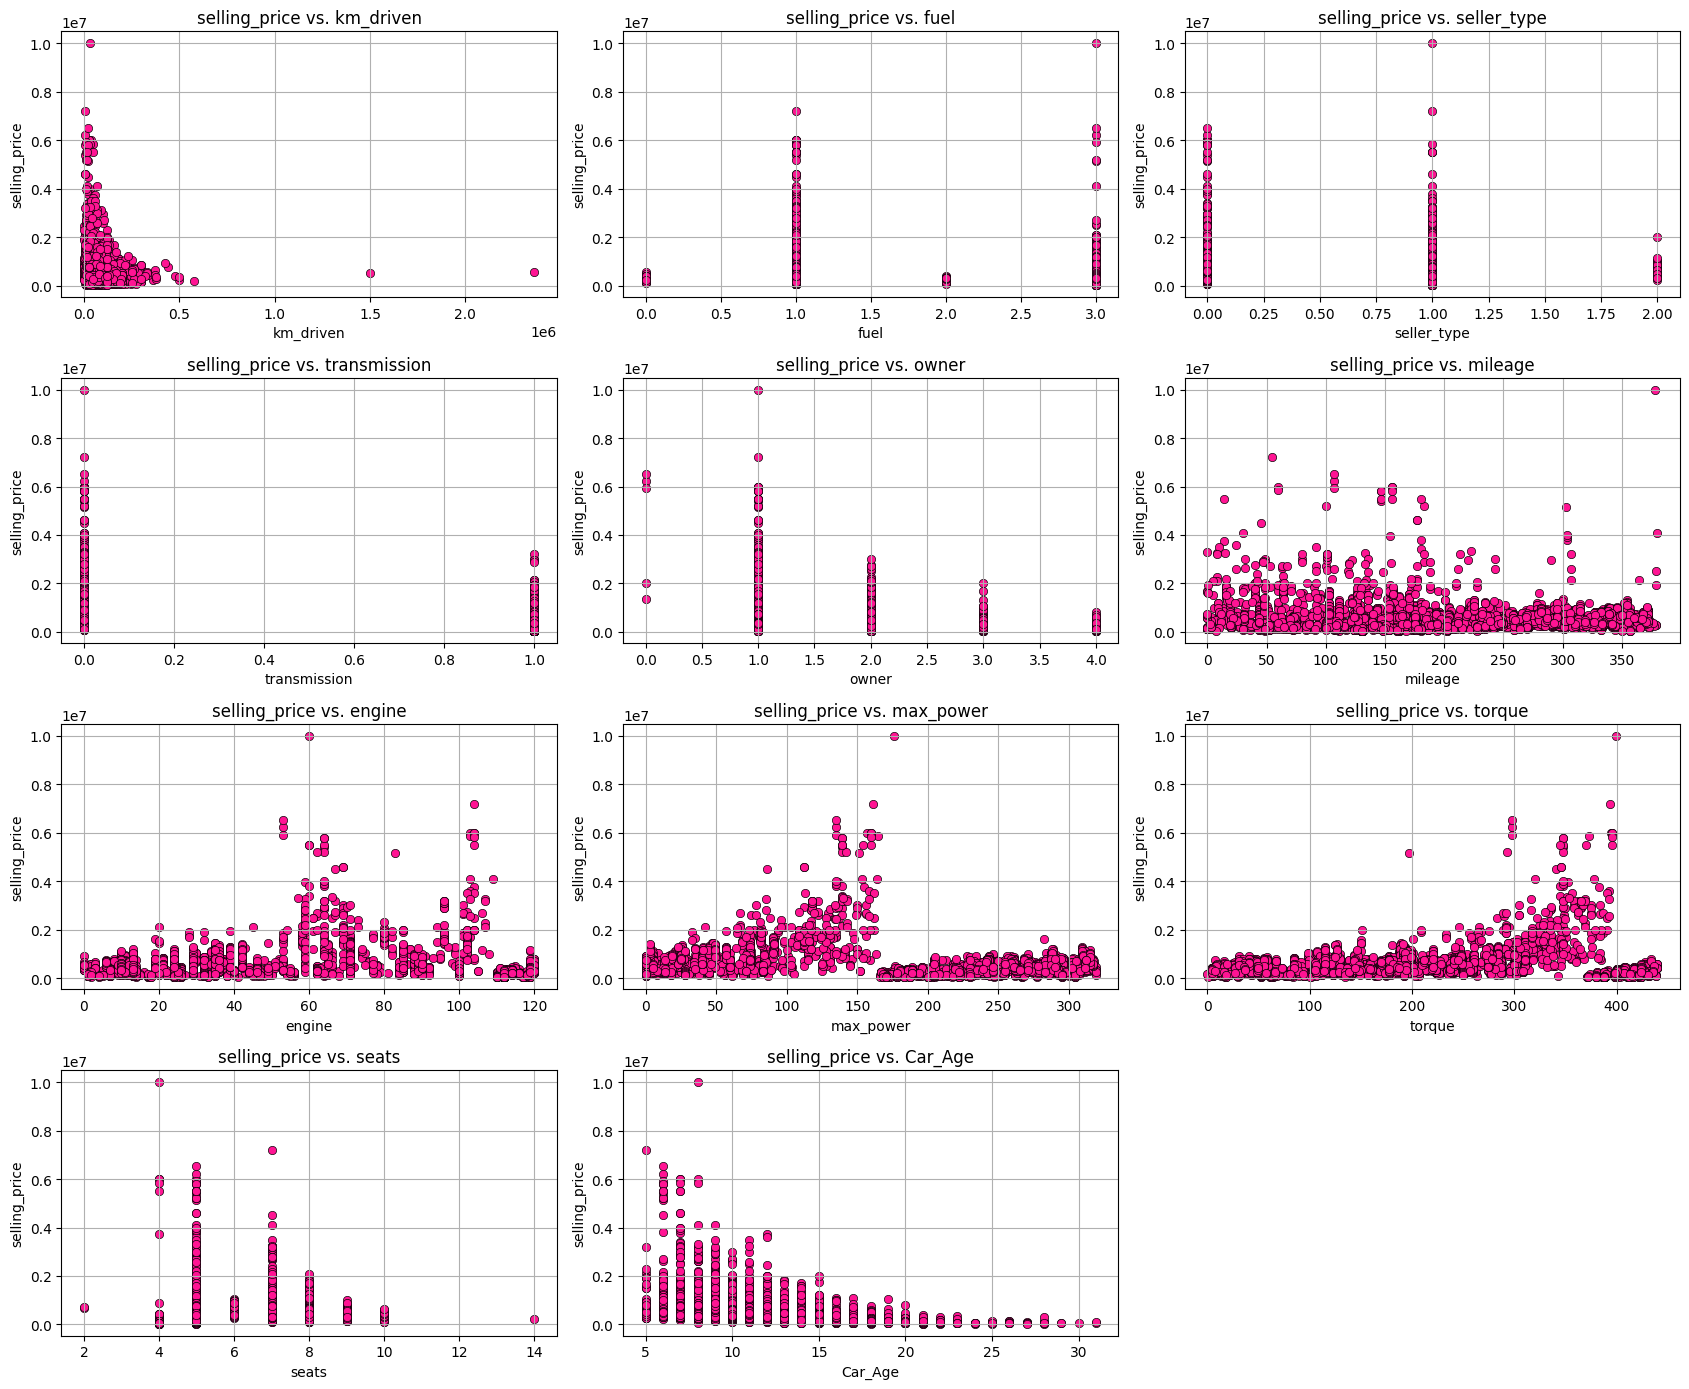

In [62]:
# Ensure a copy is created
df2_ = df2.copy()

target_ = 'selling_price'  # Defining the target column

features_ = df2_.columns.drop(target_)  # Excluding the target column from features
num_features = len(features_)

rows = (num_features + 2) // 3
cols = 3 
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(17, 3.5 * rows), dpi=100)
ax = ax.flatten()

for i, feature in enumerate(features_):
    sns.scatterplot(
        data=df2_,
        x=feature,
        y=target_,
        ax=ax[i],  
        color='deeppink',  
        edgecolor='black'  
    )
    ax[i].set_title(f'{target_} vs. {feature}', size=12)
    ax[i].set_xlabel(feature, size=10)
    ax[i].set_ylabel(target_, size=10)
    ax[i].grid()

for j in range(num_features, len(ax)):
    ax[j].axis('off')
plt.tight_layout()
plt.show()

### Feature Selection

In [63]:
# Selecting only the numerical columns
numerical_cols = df2.select_dtypes(include=['int64','int32','float64']).columns

# Computing the correlation matrix
corr_matrix = df2[numerical_cols].corr()


Evaluating the correlation between columns using a Heatmap

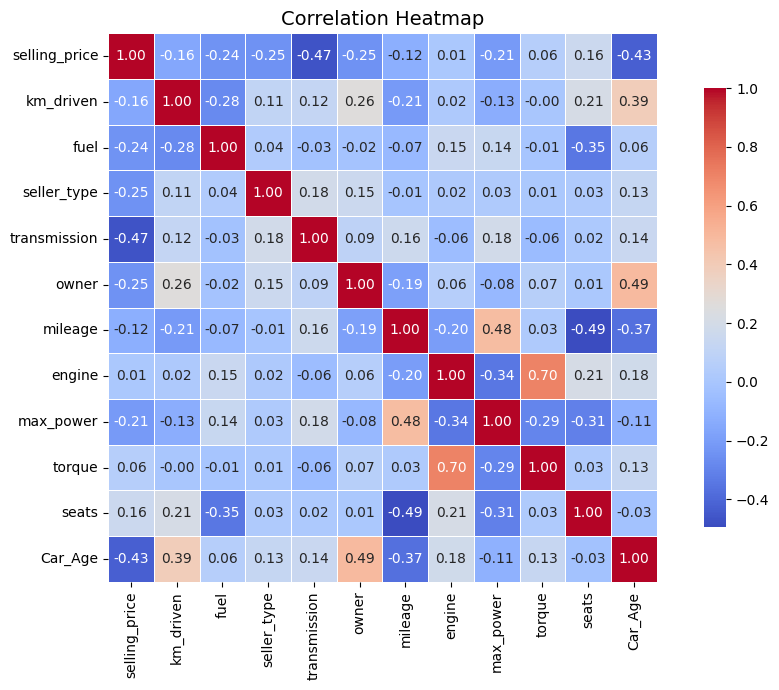

In [64]:
# Creating the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=14)

plt.tight_layout()
plt.show()

Displaying the correlation of features with Selling Price using horizontal Box Plots

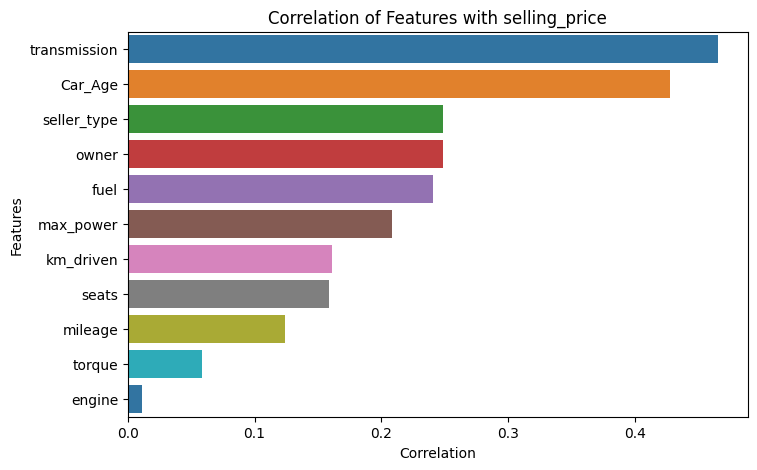

In [65]:
numerical_cols = df2.select_dtypes(include=['int64', 'int32', 'float64']).columns
corr = abs(df2[numerical_cols].corr())

# Plotting the correlation of features with selling_price
plt.figure(figsize=(8, 5))
sns.barplot(x=corr["selling_price"].sort_values(ascending=False)[1:].values,
            y=corr["selling_price"].sort_values(ascending=False)[1:].index,
            palette='tab10', hue=corr["selling_price"].sort_values(ascending=False)[1:].index)

plt.ylabel("Features")
plt.xlabel("Correlation")
plt.title("Correlation of Features with selling_price")
plt.xticks(rotation=0)
plt.show()

In [66]:
# Identifying the feature variables and target variables

feature_variables=df2.drop(['selling_price'],axis=1) 
target = df2['selling_price']                         

In [67]:
from sklearn.feature_selection import SelectKBest 

# SelectKBest to find the best features for our model
best = SelectKBest() 
best.fit(feature_variables,target)
best_T = best.transform(feature_variables)


Displaying the Feature Importance Scores using horizontal Box Plots

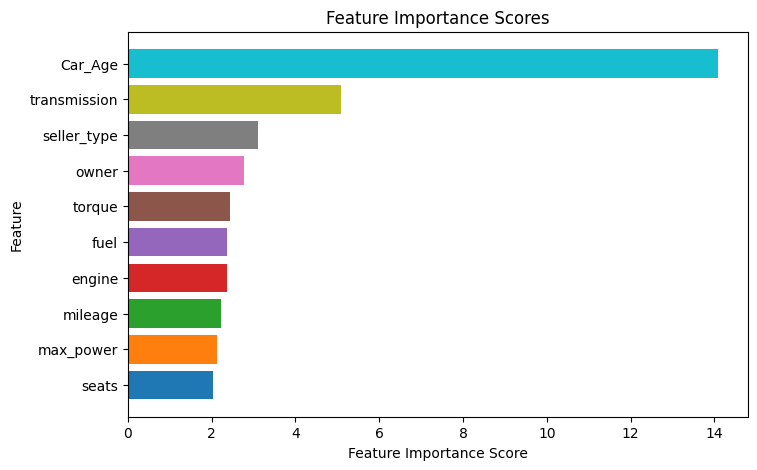

In [68]:
feature_scores = best.scores_    # Getting the scores of the selected features

selected_indices = best.get_support(indices=True) # Getting the indices of the selected features
selected_scores = best.scores_[selected_indices]  # Getting selected feature scores and names
selected_names = feature_variables.columns[selected_indices]

# Sorting features by importance in descending order
sorted_indices = selected_scores.argsort()[::-1]
selected_names, selected_scores = selected_names[sorted_indices], selected_scores[sorted_indices]

# Creating the bar plot 
plt.figure(figsize=(8, 5))
plt.barh(selected_names, selected_scores, color=sns.color_palette("tab10_r", len(selected_names)))
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

### Model Building

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler



In [70]:
#Separating features (X) and target variable (y) from the DataFrame
X = df2.drop(columns='selling_price', axis = 1)
y = df2['selling_price']

In [71]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [72]:
#Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
#Finding the best models
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    XGBRegressor()
]

In [74]:
!pip install tabulate


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from tabulate import tabulate

In [76]:
model_metrics = []

for model in regressors: 
    model.fit(X_train_scaled, y_train)    # Fit the model to the training data
    
    y_pred = model.predict(X_test_scaled)   # Make predictions on the testing set
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = model.score(X_test_scaled, y_test)
    
    model_metrics.append({'Model': model.__class__.__name__, 
                          'R Squared': r2,
                          'Mean Squared Error': mse,
                          'Mean Absolute Error': mae,
                          'Root Mean Squared Error': rmse})

# Creating a DataFrame from the list of model metrics
model_evaluation = pd.DataFrame(model_metrics)
model_evaluation = model_evaluation.sort_values(by='R Squared', ascending=False)
table = tabulate(model_evaluation, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)

╒═══════════════════════════╤═════════════╤══════════════════════╤═══════════════════════╤═══════════════════════════╕
│ Model                     │   R Squared │   Mean Squared Error │   Mean Absolute Error │   Root Mean Squared Error │
╞═══════════════════════════╪═════════════╪══════════════════════╪═══════════════════════╪═══════════════════════════╡
│ XGBRegressor              │    0.903892 │          2.27212e+10 │               78809   │                    150735 │
├───────────────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────────────────────────┤
│ GradientBoostingRegressor │    0.898114 │          2.40871e+10 │               94920.2 │                    155200 │
├───────────────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────────────────────────┤
│ RandomForestRegressor     │    0.888308 │          2.64054e+10 │               83412.3 │                    162497 │
├───────────────────────────┼─────────────┼─────

From the results above, it can be seen that XGBRegressor, GradientBoostingRegressor and RandomForestRegressor are the best fit models for this data.

Let us explore these models individually:

## XGBoost Regressor

##### Hyperparameter Tuning

In [77]:
# Defining the parameter grid to search
param_grid_xgb = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 4, 5], 
    'min_child_weight': [1, 3, 5], 
    'gamma': [0, 0.1, 0.2],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0], 
    'reg_alpha': [0, 0.1, 0.5],  
    'reg_lambda': [0, 0.1, 0.5]  
}

In [78]:
# Initialize XGBRegressor
xgb_regressor = XGBRegressor(random_state=42)

In [79]:
# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(xgb_regressor, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)  # Printing the best parameters found

Best Parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [80]:
# Getting the best model
best_xgb_regressor = random_search.best_estimator_

# Make predictions on the testing set
y_pred = best_xgb_regressor.predict(X_test_scaled)

In [81]:
# Evaluate the model
r2   = r2_score(y_test, y_pred)            
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      
 
results = pd.DataFrame([['XGBRegressor', r2, mae, mse, rmse]],   #Defining a DataFrame
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,XGBRegressor,0.917846,76690.878957,1.942233e+10,139364.022334


The tuned model configuration will be used, since hyperparameter tuning has resulted in an improvement in the R-squared score.

Scatter plot for Residual vs Predicted values from XGBRegressor

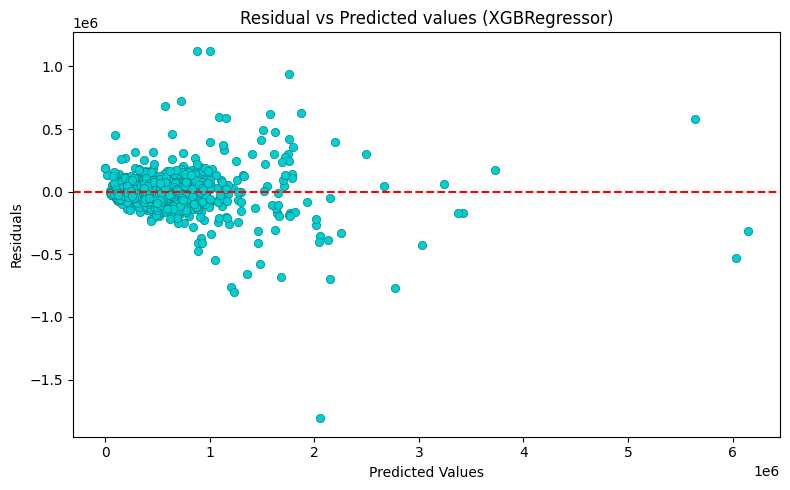

In [82]:
# Plotting residuals (the difference between the true and predicted values)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='darkturquoise', edgecolor='teal')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual vs Predicted values (XGBRegressor)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


Scatter plot for Actual vs Predicted values from XGBRegressor

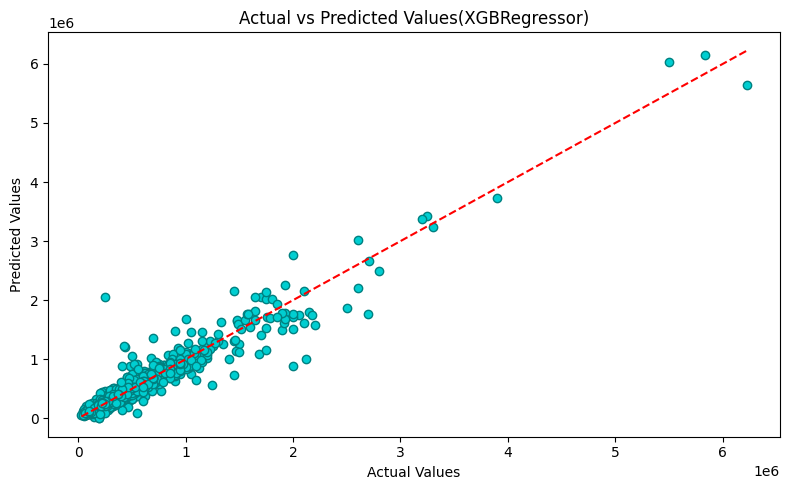

In [83]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='darkturquoise', edgecolors='teal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values(XGBRegressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


Distribution plot for Residuals from XGBRegressor

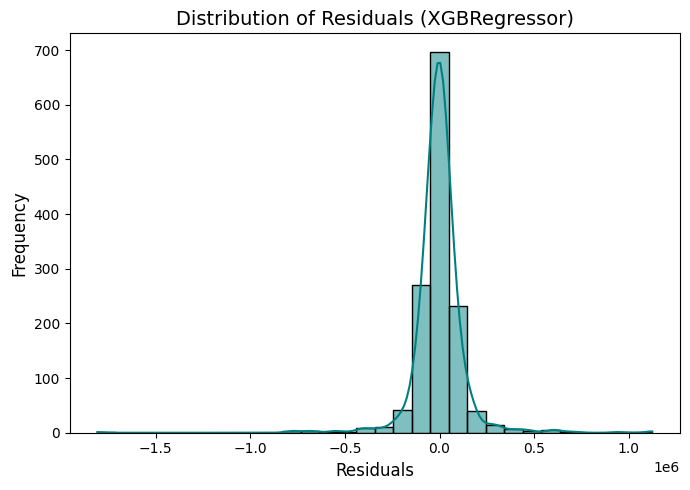

In [84]:
# Plotting the distribution of residuals

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, color='teal', bins=30)

plt.title('Distribution of Residuals (XGBRegressor)', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


## Gradient Boosting Regressor

##### Hyperparameter tuning

In [85]:
# Initialize the model
gbr = GradientBoostingRegressor()

In [86]:
# Defining the parameter grid
param_grid_gbr = {
    'n_estimators': [50, 100, 200, 300, 400],  
    'learning_rate': [0.01, 0.05, 0.1, 0.15], 
    'max_depth': [3, 4, 5, 6],  
    'min_samples_split': [2, 3, 5],  
    'min_samples_leaf': [1, 2, 4, 5],  
}

In [87]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(gbr, param_distributions=param_grid_gbr, 
                                   n_iter=100,  
                                   cv=5,        
                                   scoring='r2',  
                                   n_jobs=-1,     
                                   random_state=42) 


In [88]:
# Fit the model
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   random_state=42, scoring='r2')

In [89]:
# Getting the best parameters

best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 5, 'learning_rate': 0.1}


In [90]:
#Getting the best model
best_gb_regressor  = random_search.best_estimator_

# Make predictions on the testing set
y_pred = best_gb_regressor.predict(X_test_scaled)

In [91]:
# Evaluate the model
r2   = r2_score(y_test, y_pred)            
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      

results = pd.DataFrame([['Gradient Boosting Regressor', r2, mae, mse, rmse]],    #Defining a DataFrame 
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Gradient Boosting Regressor,0.907297,78674.170881,2.191617e+10,148041.124282


The tuned model configuration will be used, since hyperparameter tuning has resulted in an improvement in the R-squared score.

Scatter plot for Residual vs Predicted values from Gradient Boosting Regressor

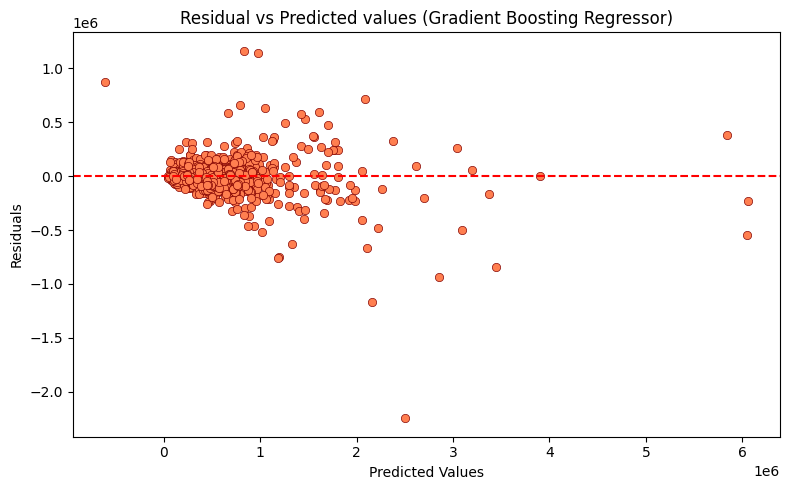

In [92]:
# Predicting using the trained model
y_pred = random_search.best_estimator_.predict(X_test_scaled)

# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='coral', edgecolor='maroon')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual vs Predicted values (Gradient Boosting Regressor)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


Scatter plot of Actual vs Predicted values from Gradient Boosting Regressor

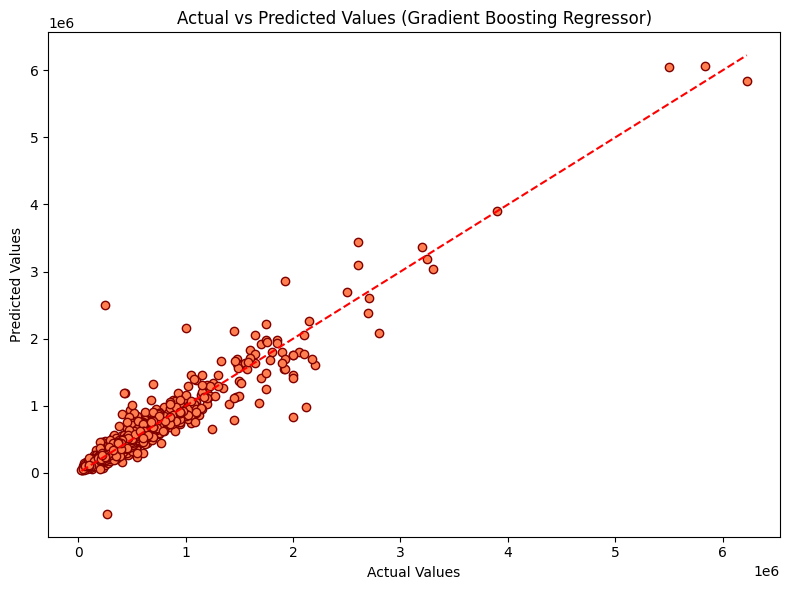

In [93]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='coral',edgecolors='maroon')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Gradient Boosting Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


Distribution plot for Residuals from Gradient Boosting Regressor

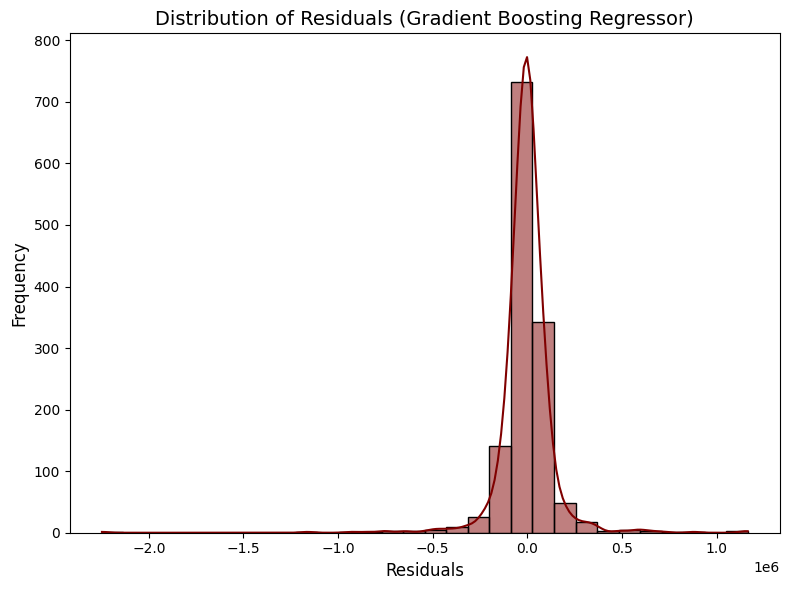

In [94]:
# Plotting the distribution of residuals for Gradient Boosting Regressor
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='maroon', bins=30)

plt.title('Distribution of Residuals (Gradient Boosting Regressor)', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

## Random Forest Regressor

##### Hyperparameter Tuning

In [95]:
# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],  
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 5, 10, 15],  
    'min_samples_leaf': [1, 2, 4, 6, 8] 
}

In [96]:
# Instantiate the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

In [97]:
# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid_rf, 
                                   n_iter=100, cv=5, scoring='r2', n_jobs=-1, random_state=42)


In [98]:
# Fit the randomized search to the training data
random_search.fit(X_train_scaled, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='r2')

In [99]:
# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [100]:
# Getting the best model
best_rf_regressor = random_search.best_estimator_

# Make predictions on the testing set
y_pred = best_rf_regressor.predict(X_test_scaled)

# Evaluate the model
r2   = r2_score(y_test, y_pred)            
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      

results = pd.DataFrame([['Random Forest Regressor', r2, mae, mse, rmse]],     #Defining a DataFrame 
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,0.874375,84303.729193,2.969933e+10,172334.934184


The default model configuration will be used as hyperparameter tuning did not lead to an improvement in the R-squared score.

In [101]:
# Fitting the model
rf_regressor.fit(X_train_scaled, y_train)

#Predicting on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Calculating residuals
residuals = y_test - y_pred

Scatter plot for Residual vs Predicted values from Random Forest Regressor	

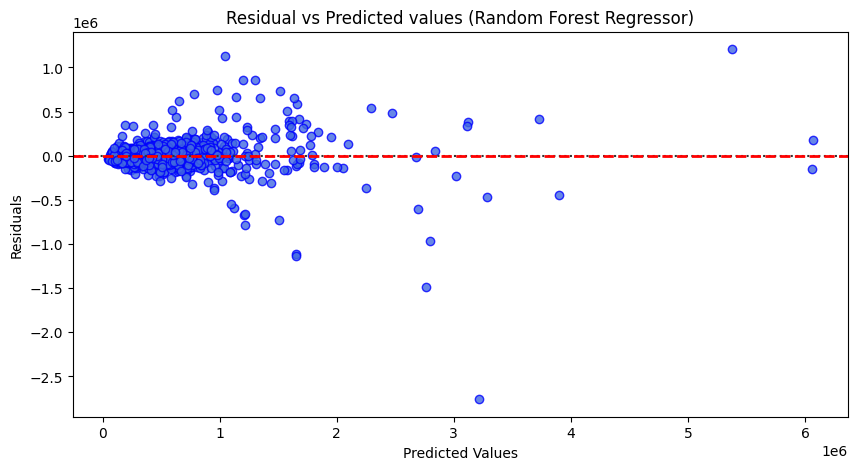

In [102]:
# Residual Plot
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=False, line_kws={'color': 'red'}, scatter_kws={'color': 'royalblue', 'edgecolor': 'blue',})
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual vs Predicted values (Random Forest Regressor)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Scatter plot of Actual vs Predicted values from Random Forest Regressor	

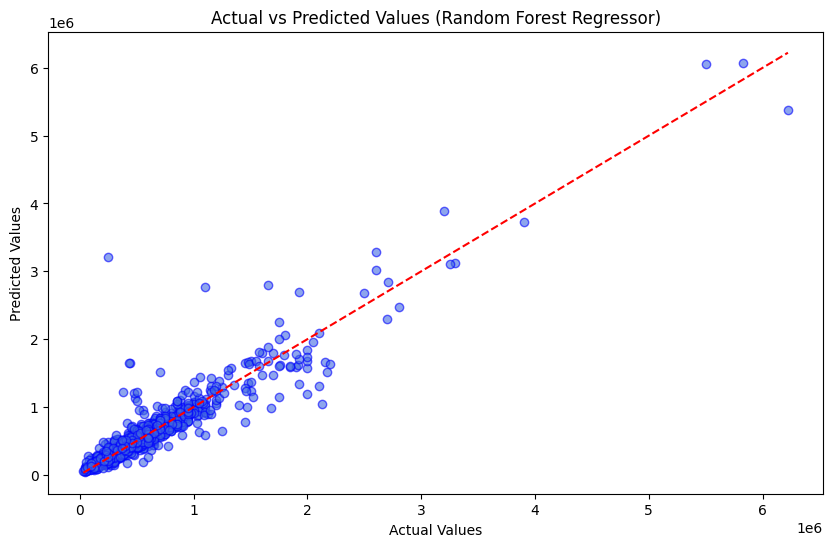

In [103]:
# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, edgecolors='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Distribution plot for Residuals from Random Forest Regressor	

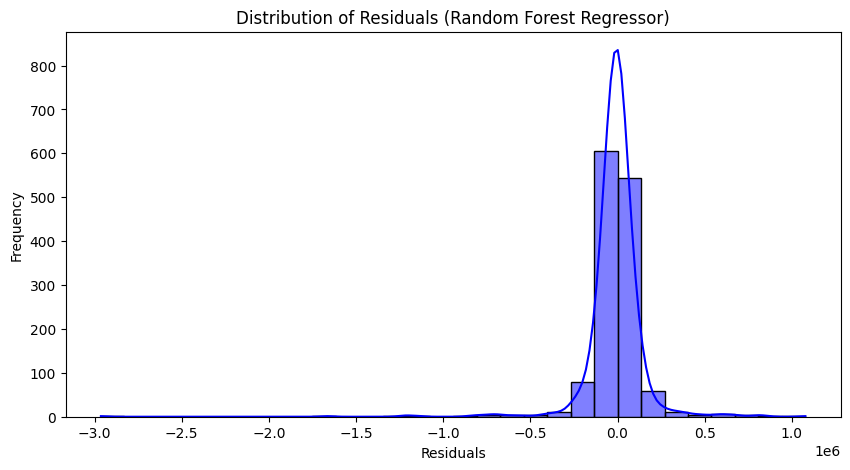

In [104]:
# Distribution Plot of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals (Random Forest Regressor)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Decision Tree Regressor

##### Hyperparameter Tuning

In [105]:
# Define the parameter grid to search
param_grid_dt = { 
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10, 20, 30],  
    'min_samples_leaf': [1, 2, 4, 6, 8],  
    'splitter': ['best', 'random']   # Strategy used to choose the split at each node
}

In [106]:
# Instantiate the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

In [107]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt_regressor,
    param_distributions=param_grid_dt,
    n_iter=100,  
    scoring='r2',  
    cv=5, 
    random_state=42,
    n_jobs=-1  
)

In [108]:
# Fit to the training data
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 20, 30],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='r2')

In [109]:
# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30}


In [110]:
# Get the best model
best_dt_regressor = random_search.best_estimator_

# Make predictions on the testing set
y_pred = best_dt_regressor.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      

results = pd.DataFrame([['Decision Tree Regressor', r2, mae, mse, rmse]],    #Defining a DataFrame 
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])
results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Decision Tree Regressor,0.746207,97850.680024,5.999986e+10,244948.693227


The default model configuration will be used as hyperparameter tuning did not lead to an improvement in the R-squared score.

In [111]:
# Fit the model
dt_regressor.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = dt_regressor.predict(X_test_scaled)

# Calculating residuals
residuals = y_test - y_pred

Scatter Plot of Residual vs Predicted values from Decision Tree Regressor	

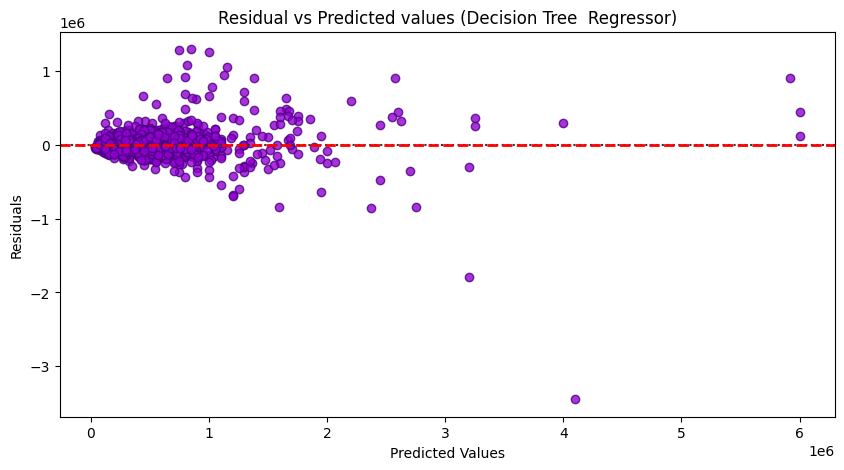

In [112]:
# Residual Plot
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=False, line_kws={'color': 'red'}, scatter_kws={'color': 'darkviolet', 'edgecolor': 'indigo',})
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual vs Predicted values (Decision Tree  Regressor)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Scatter Plot of Actual vs Predicted values from Decision Tree Regressor

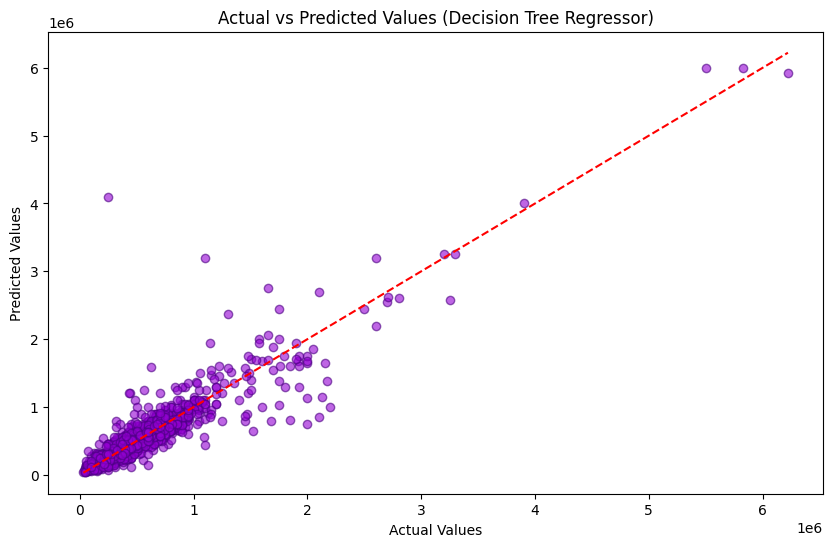

In [113]:
# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='darkviolet', alpha=0.6, edgecolors='indigo')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Distribution plot for Residuals from Decision Tree Regressor

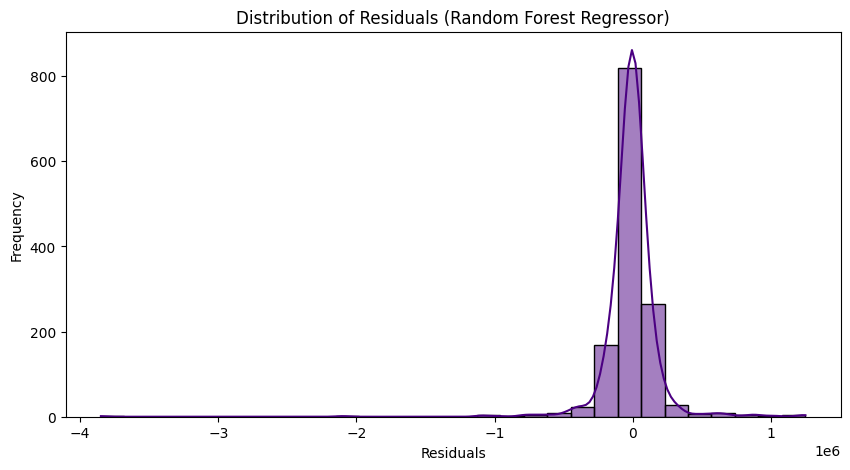

In [114]:
# Distribution Plot of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='indigo', bins=30)
plt.title('Distribution of Residuals (Random Forest Regressor)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## K-Neighbors Regressor

##### Hyperparameter Tuning

In [115]:
# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],  
    'weights': ['uniform', 'distance'],  
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],  
    'p': [1, 2, 3]  
}

In [116]:
# Instantiate the KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

In [117]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn_regressor,
    param_distributions=param_grid_knn,
    n_iter=100,  
    scoring='r2', 
    cv=5,  
    random_state=42,
    n_jobs=-1  
)

In [118]:
# Fit to the training data
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan', 'chebyshev'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='r2')

In [119]:
# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'metric': 'manhattan'}


In [120]:
# Get the best model
best_knn_regressor = random_search.best_estimator_

# Make predictions on the testing set
y_pred = best_knn_regressor.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      

results = pd.DataFrame([['K-Neighbors Regressor', r2, mae, mse, rmse]],      #Defining a DataFrame 
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])
results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,K-Neighbors Regressor,0.838825,97987.575105,3.810388e+10,195202.149208


The tuned model configuration will be used, since hyperparameter tuning has resulted in an improvement in the R-squared score.

Scatter plot for Residual vs Predicted values from K-Neighbors Regressor

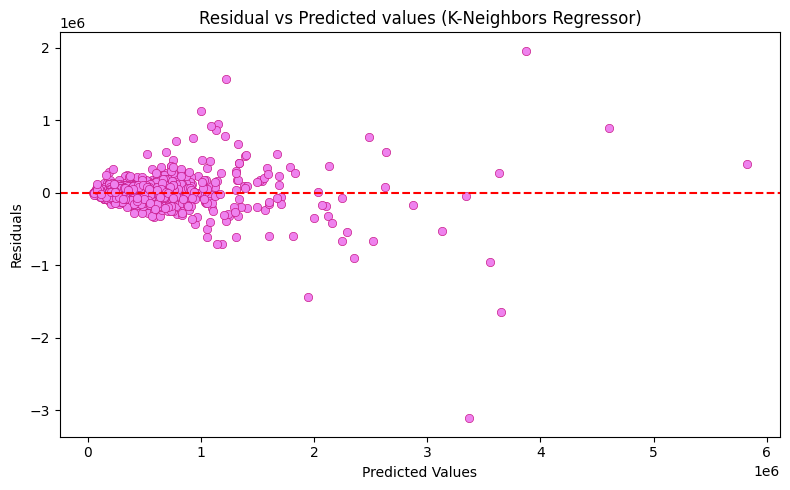

In [121]:
# Predicting using the trained model
y_pred = random_search.best_estimator_.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='violet',edgecolor='mediumvioletred')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual vs Predicted values (K-Neighbors Regressor)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


Scatter Plot of Actual vs Predicted values from K-Neighbors Regressor

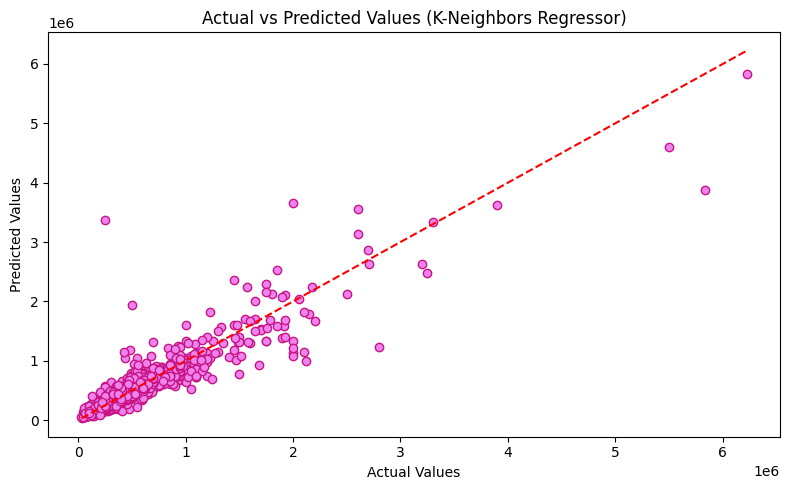

In [122]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='violet',edgecolors='mediumvioletred')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (K-Neighbors Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

Distribution Plot for Residuals from K-Neighbors Regressor

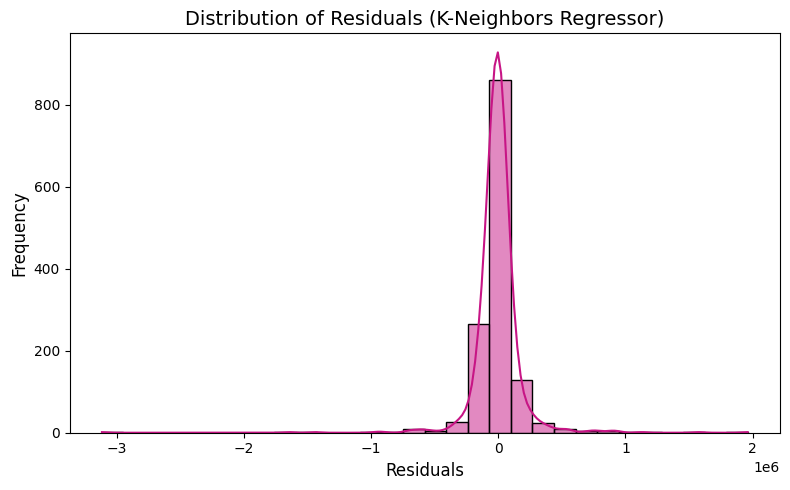

In [123]:
# Plotting the distribution of residuals for K-Neighbors Regressor	
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='mediumvioletred', bins=30)

# Adding labels and title
plt.title('Distribution of Residuals (K-Neighbors Regressor)', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

## Linear Regression

In [124]:
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train_scaled, y_train)


LinearRegression()

In [125]:
# Predict on the test data
y_pred = linear_regressor.predict(X_test_scaled)

In [126]:
# Evaluate the model
r2   = r2_score(y_test, y_pred)            
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                      
 
results = pd.DataFrame([['Linear Regression', r2, mae, mse, rmse]],     
#Defining a DataFrame
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

results

,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.484987,204176.376891,1.217554e+11,348934.641162


### Assumptions of Linear Regression:

##### Homoscedasticity

Scatter plot for Residual vs Predicted values from Linear Regression

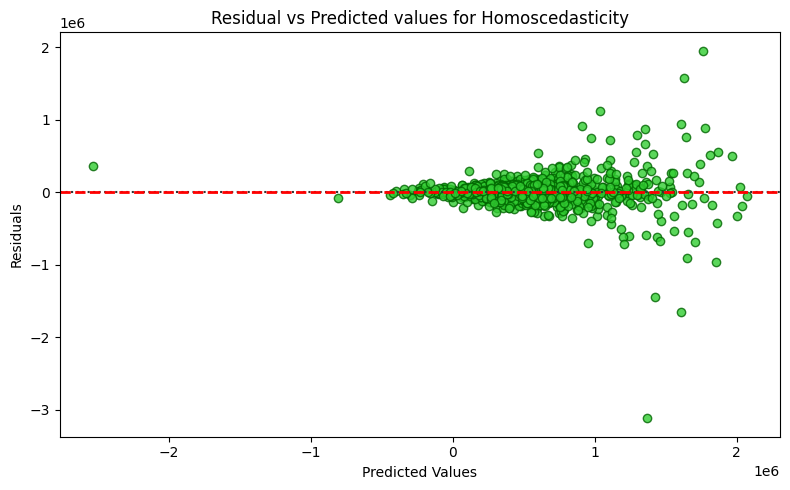

In [127]:
plt.figure(figsize=(8, 5))
sns.residplot(
    x=y_pred,
    y=residuals,
    lowess=False,
    line_kws={'color': 'red'},
    scatter_kws={'color': 'limegreen', 'edgecolor': 'darkgreen'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual vs Predicted values for Homoscedasticity')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


##### Linearity

Scatter plot for Actual vs Predicted values from Linear Regression

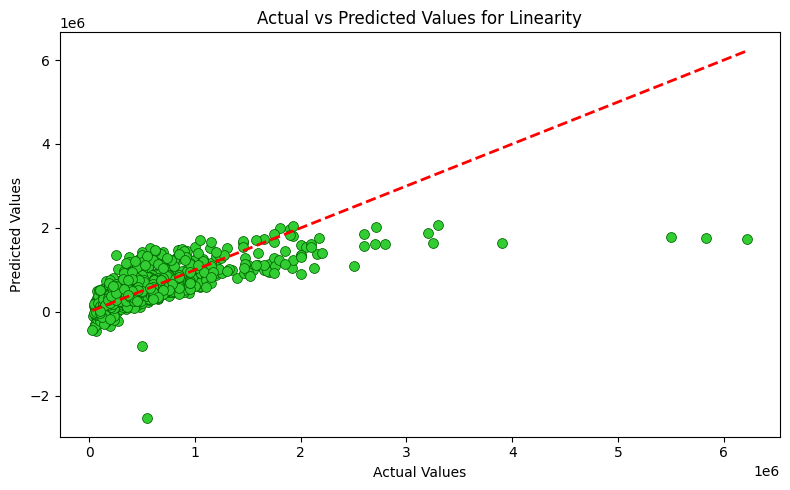

In [128]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    color='limegreen',
    edgecolor='darkgreen',
    s=50
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values for Linearity')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


##### Normality

Distribution plot for Residuals from Linear Regression

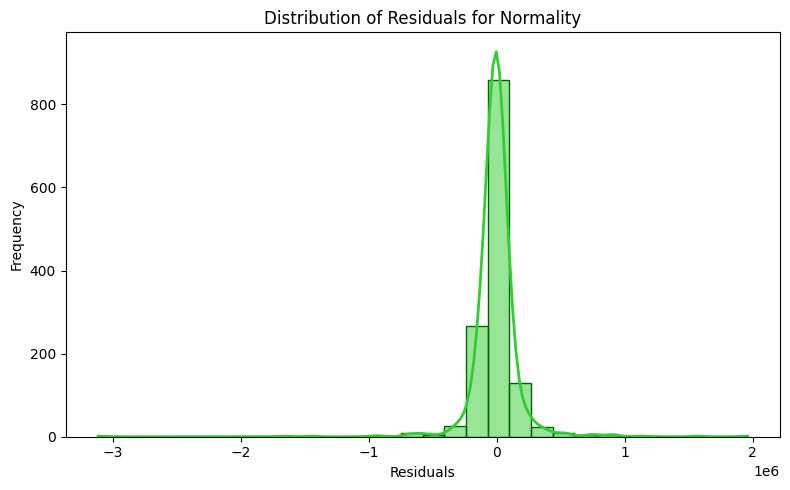

In [129]:
plt.figure(figsize=(8, 5))
sns.histplot(
    residuals,
    kde=True,
    bins=30,
    color='limegreen',
    edgecolor='darkgreen',
    line_kws={'linewidth': 2, 'color': 'red'}  
)
plt.title('Distribution of Residuals for Normality')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



### Comparison of Model Performance Metrics

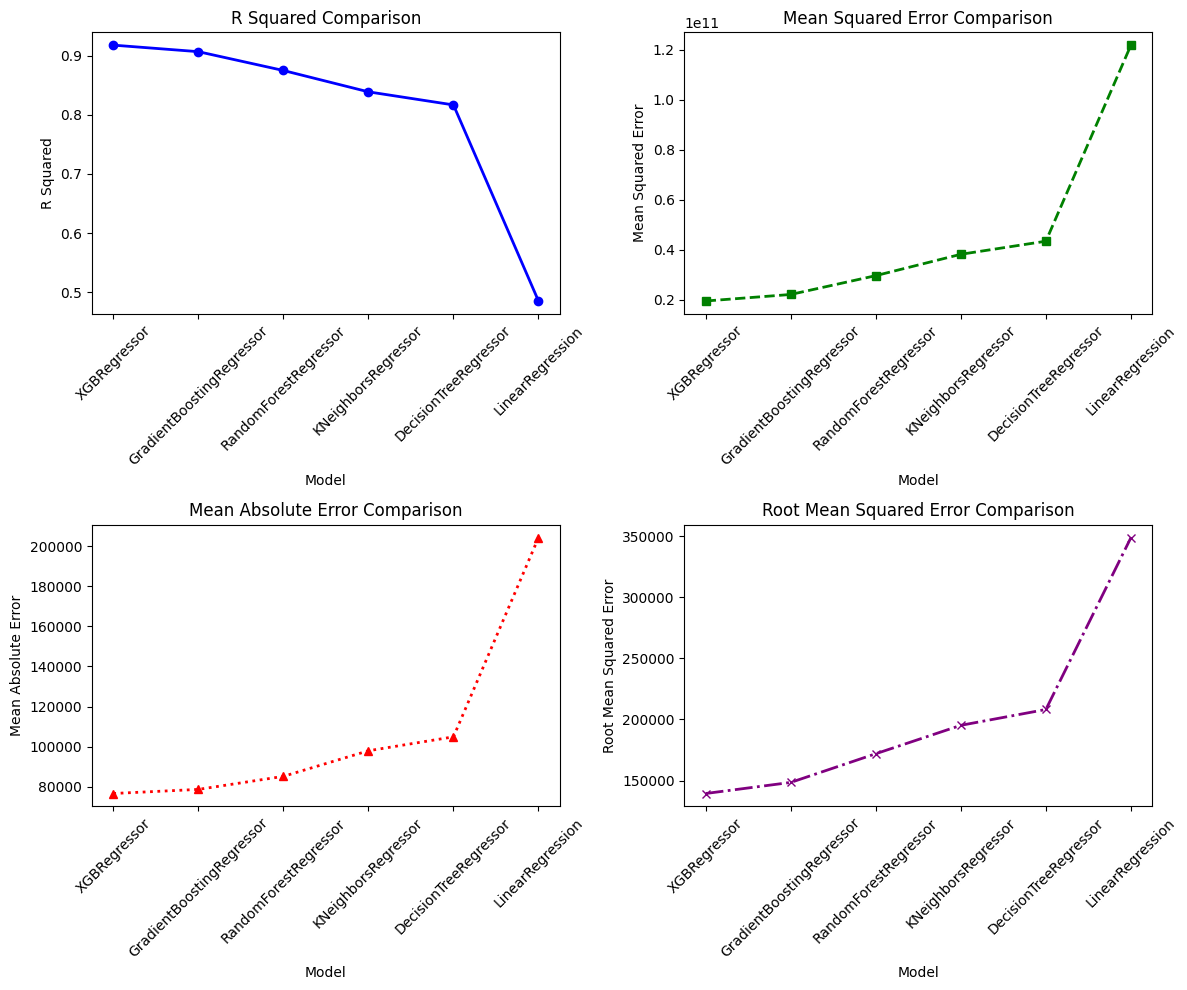

In [130]:
# Defining models
regressors = {
    "XGBRegressor": best_xgb_regressor,
    "GradientBoostingRegressor": best_gb_regressor,
    "RandomForestRegressor": rf_regressor,
    "DecisionTreeRegressor": dt_regressor,
    "KNeighborsRegressor": best_knn_regressor,
    "LinearRegression": linear_regressor
}

# Training & evaluate models
model_metrics = []
for name, model in regressors.items():
    model.fit(X_train_scaled, y_train)    
    y_pred = model.predict(X_test_scaled)   
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = model.score(X_test_scaled, y_test)
    
    model_metrics.append({'Model': name, 
                          'R Squared': r2,
                          'Mean Squared Error': mse,
                          'Mean Absolute Error': mae,
                          'Root Mean Squared Error': rmse})

# Converting to DataFrame & sorting by R² value
model_evaluation = pd.DataFrame(model_metrics).sort_values(by='R Squared', ascending=False)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

metrics = ['R Squared', 'Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error']
colors = ['blue', 'green', 'red', 'purple']
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'x']

for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    ax.plot(model_evaluation['Model'], model_evaluation[metric], 
            marker=markers[i], color=colors[i], linestyle=linestyles[i], linewidth=2)
    ax.set_title(f'{metric} Comparison', fontsize=12)
    ax.set_xlabel('Model', fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In conclusion, XGBoost Regressor performs the best overall, achieving the highest R-squared and the lowest error metrics.

Gradient Boosting and Random Forest Regressors also perform well, but slightly worse than XGBoost.

Linear Regression performs the worst across all metrics, making it the least suitable model for this dataset.


From the results above, it can be seen that XGBRegressor, GradientBoostingRegressor and RandomForestRegressor are the best fit models for this data.